In [ ]:
https://watlab-blog.com/2022/10/08/2d-diffusion/
https://watlab-blog.com/2022/10/02/2d-advection/
https://python.keicode.com/lang/regular-expression-finditer.php

In [ ]:
"""
imshow vminとvmax

HAMは初期場のみ

overflow 回避、時間幅を変える


"""

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os
import glob
import matplotlib.pyplot as plt
import re
import pandas as pd
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
Sim_data= pd.read_csv('drive/My Drive/Colab Notebooks/Diffusion-ish/Sim_Param.csv')

Mounted at /content/drive


In [ ]:
"""
plot内に、saveで、特定の名前をつけて保存


a = "hoge1.jpg"
b = hoge2

aとbを整列したABを保存

"""

'\nplot内に、saveで、特定の名前をつけて保存\n\n\na = "hoge1.jpg"\nb = hoge2\n\naとbを整列したABを保存\n\n'

In [ ]:
def initial_field(x, y):
    zero_wusr = np.zeros((len(y), len(x)))
    zero_wusp = np.zeros((len(y), len(x)))
    zero_clvr = np.zeros((len(y), len(x)))
    zero_clvp = np.zeros((len(y), len(x)))
    zero_erf = np.zeros((len(y), len(x)))
    zero_ham = np.zeros((len(y), len(x)))

    # 2D Gaussian(sigma:分散共分散行列, mu:平均ベクトル)
    wr_sigma = np.array([[wr_sigma11, wr_sigma12], [wr_sigma21, wr_sigma22]])
    wr_det_sigma, wr_inv_sigma = np.linalg.det(wr_sigma), np.linalg.inv(wr_sigma)

    wp_sigma = np.array([[wp_sigma11, wp_sigma12], [wp_sigma21, wp_sigma22]])
    wp_det_sigma, wp_inv_sigma = np.linalg.det(wp_sigma), np.linalg.inv(wp_sigma)

    cr_sigma = np.array([[cr_sigma11, cr_sigma12], [cr_sigma21, cr_sigma22]])
    cr_det_sigma, cr_inv_sigma = np.linalg.det(cr_sigma), np.linalg.inv(cr_sigma)

    cp_sigma = np.array([[cp_sigma11, cp_sigma12], [cp_sigma21, cp_sigma22]])
    cp_det_sigma, cp_inv_sigma = np.linalg.det(cp_sigma), np.linalg.inv(cp_sigma)

    e_sigma = np.array([[e_sigma11, e_sigma12], [e_sigma21, e_sigma22]])
    e_det_sigma, e_inv_sigma = np.linalg.det(e_sigma), np.linalg.inv(e_sigma)

    h_sigma = np.array([[h_sigma11, h_sigma12], [h_sigma21, h_sigma22]])
    h_det_sigma, h_inv_sigma = np.linalg.det(h_sigma), np.linalg.inv(h_sigma)

    def get_wusr(z, mu_wusr_x, mu_wusr_y):
       mu_wusr = np.array([mu_wusr_x, mu_wusr_y])
       def z_wusr(z):
            z_wusr = z.T
            for i in range(len(z)):
                for j in range(len(z.T)):
                    Xwusr = np.array([x[i], y[j]])
                    z_wusr[i, j] = (1 / np.sqrt(2 * np.pi * wr_det_sigma)) * np.exp((-1 / 2) * (Xwusr - mu_wusr).T @ wr_inv_sigma @ (Xwusr - mu_wusr)) * wr_AMP
            return z_wusr
       zz_wusr = z_wusr(z)
       zzz_wusr = zz_wusr.T
       return zzz_wusr

    def get_wusp(z, mu_wusp_x, mu_wusp_y):
       mu_wusp = np.array([mu_wusp_x, mu_wusp_y])
       def z_wusp(z):
            z_wusp = z.T
            for i in range(len(z)):
                for j in range(len(z.T)):
                    Xwusp = np.array([x[i], y[j]])
                    z_wusp[i, j] = (1 / np.sqrt(2 * np.pi * wp_det_sigma)) * np.exp((-1 / 2) * (Xwusp - mu_wusp).T @ wp_inv_sigma @ (Xwusp - mu_wusp)) * wp_AMP
            return z_wusp
       zz_wusp = z_wusp(z)
       zzz_wusp = zz_wusp.T
       return zzz_wusp

    def get_clvr(z, mu_clvr_x, mu_clvr_y):
       mu_clvr = np.array([mu_clvr_x, mu_clvr_y])
       def z_clvr(z):
            z_clvr = z.T
            for i in range(len(z)):
                for j in range(len(z.T)):
                    Xclvr = np.array([x[i], y[j]])
                    z_clvr[i, j] = (1 / np.sqrt(2 * np.pi * cr_det_sigma)) * np.exp((-1 / 2) * (Xclvr - mu_clvr).T @ cr_inv_sigma @ (Xclvr - mu_clvr)) * cr_AMP
            return z_clvr
       zz_clvr = z_clvr(z)
       zzz_clvr = zz_clvr.T
       return zzz_clvr

    def get_clvp(z, mu_clvp_x, mu_clvp_y):
       mu_clvp = np.array([mu_clvp_x, mu_clvp_y])
       def z_clvp(z):
            z_clvp = z.T
            for i in range(len(z)):
                for j in range(len(z.T)):
                    Xclvp = np.array([x[i], y[j]])
                    z_clvp[i, j] = (1 / np.sqrt(2 * np.pi * cp_det_sigma)) * np.exp((-1 / 2) * (Xclvp - mu_clvp).T @ cp_inv_sigma @ (Xclvp - mu_clvp)) * cp_AMP
            return z_clvp
       zz_clvp = z_clvp(z)
       zzz_clvp = zz_clvp.T
       return zzz_clvp

    def get_erf(z, mu_erf_x, mu_erf_y):
       mu_erf = np.array([mu_erf_x, mu_erf_y])
       def z_erf(z):
            z_erf = z.T
            for i in range(len(z)):
                for j in range(len(z.T)):
                    Xerf = np.array([x[i], y[j]])
                    z_erf[i, j] = (1 / np.sqrt(2 * np.pi * e_det_sigma)) * np.exp((-1 / 2) * (Xerf - mu_erf).T @ e_inv_sigma @ (Xerf - mu_erf)) * e_AMP
            return z_erf
       zz_erf = z_erf(z)
       zzz_erf = zz_erf.T
       return zzz_erf


    def get_ham(z, mu_ham_x, mu_ham_y):
       mu_ham = np.array([mu_ham_x, mu_ham_y])
       def z_ham(z):
            z_ham = z.T
            for i in range(len(z)):
                for j in range(len(z.T)):
                    Xham = np.array([x[i], y[j]])
                    z_ham[i, j] = (1 / np.sqrt(2 * np.pi * h_det_sigma)) * np.exp((-1 / 2) * (Xham - mu_ham).T @ h_inv_sigma @ (Xham - mu_ham)) * h_AMP
            return z_ham
       zz_ham = z_ham(z)
       zzz_ham = zz_ham.T
       return zzz_ham

    zzz_wusr = get_wusr(zero_wusr, mu_wusr_x, mu_wusr_y)
    zzz_wusp = get_wusp(zero_wusp, mu_wusp_x, mu_wusp_y)
    zzz_clvr = get_clvr(zero_clvr, mu_clvr_x, mu_clvr_y)
    zzz_clvp = get_clvp(zero_clvp, mu_clvp_x, mu_clvp_y)
    zzz_erf = get_erf(zero_erf, mu_erf_x, mu_erf_y)
    zzz_ham = get_ham(zero_ham, mu_ham_x, mu_ham_y)

    return zzz_wusr, zzz_wusp, zzz_clvr, zzz_clvp, zzz_erf, zzz_ham


def boundary_condition(a):
    a[:, 0], a[:, -1], a[0, :], a[-1, :] = 0, 0, 0, 0  # left, right, up. bottom

    return a


In [ ]:
def sol_2d_diffusion(x, y, wusr, wusp, clvr, clvp, erf, ham, pull, ID):
    ''' 2次元拡散方程式を計算する '''

    dt, dx, dy, a, step, result_interval =\
       pull[0], pull[1], pull[2], pull[3], pull[4], pull[5]

    wusr, wusp, clvr, clvp, erf, ham = wusr.T, wusp.T, clvr.T, clvp.T, erf.T, ham.T

    for n in range(step):
        wusr0, wusp0, clvr0, clvp0, erf0, ham0 =\
          wusr.copy(), wusp.copy(), clvr.copy(), clvp.copy(), erf.copy(), ham.copy()

        wusr0, wusp0, clvr0, clvp0, erf0, ham0 =\
           np.floor(wusr0), np.floor(wusp0), np.floor(clvr0), np.floor(clvp0), np.floor(erf0), np.floor(ham0)

        #print(wusr0)

        for i in range(1, len(wusr) - 1):
            for j in range(1, len(wusr.T) - 1):

                # b_W -> b_Ww, k0_W -> ki_W, a_C -> a_Cc, b_p -> b_pp, k_p -> k_pp, b_H -> b_Hh, k_H -> k_Hh, k_L -> k_Ll, b_L -> b_Ll, D_W -> D_Ww, D_C -> D_Cc, D_L -> D_Ll

                wusr[i, j] = k_Wr * ((k_WL/(1 + (erf0[i, j] / K_WL)**n_WL)) + (k_WC/(1+(clvp0[i, j] / K_WC )**n_WC))) * (ki_W + ((wusp0[i, j] / K_WW)**n_WW / (1+(wusp0[i, j] / K_WW)**n_WW)))  - b_Wr * wusr0[i, j]
                wusp[i, j] = k_Wp * wusr0[i, j] - b_Ww * wusp0[i, j] + D_Ww * (wusp0[i+1, j] - 2 * wusp0[i, j] + wusp0[i-1, j])  +  D_Ww * (wusp0[i, j+1] - 2 * wusp0[i, j] + wusp0[i, j-1])
                clvr[i, j] = (k_Cr / (1+(erf0[i, j]/K_CL)**n_CL)) * (a_Cc + ((wusp0[i, j]/K_CW)**n_CW / (1 + (wusp0[i, j]/K_CW)**n_CW))) * (1/(1+(ham0[i, j]/K_CH)**n_CH))  - b_Cr * clvr0[i, j]
                clvp[i, j] = k_Cp * clvr0[i, j] - b_Cr * clvp0[i, j] + D_Cc * (clvp0[i+1, j] - 2 * clvp0[i, j] + clvp0[i-1, j]) + D_Cc * (clvp0[i, j+1] - 2 * clvp0[i, j] + clvp0[i, j-1])
                erf[i, j] = k_Ll - b_Ll * erf0[i, j]  +  D_Ll * (erf0[i+1, j] - 2 * erf0[i, j] + erf0[i-1, j])  +  D_Ll * (erf0[i, j+1] - 2 * erf0[i, j] + erf0[i, j-1])


        # 境界条件を設定
        wusr, wusp, clvr, clvp, erf, ham = wusr.T, wusp.T, clvr.T, clvp.T, erf.T, ham.T

        wusr, wusp, clvr, clvp, erf, ham =\
          boundary_condition(wusr), boundary_condition(wusp), boundary_condition(clvr),\
          boundary_condition(clvp), boundary_condition(erf), boundary_condition(ham)

        wusr, wusp, clvr, clvp, erf, ham = wusr.T, wusp.T, clvr.T, clvp.T, erf.T, ham.T

        if n % result_interval == 0:
            print('Iteration=', n)
            wusr, wusp, clvr, clvp, erf, ham = wusr.T, wusp.T, clvr.T, clvp.T, erf.T, ham.T


            #print(wusr0)
            #print(wusp0)
            #print(clvr0)
            #print(clvp0)
            #print(erf0)

            if plsv_wusr == 1:
                plot(x, y, wusr, n, wusr_str, c_wusr, ID)
            if plsv_wusp == 1:
                plot(x, y, wusp, n, wusp_str, c_wusp, ID)
            if plsv_clvr == 1:
                plot(x, y, clvr, n, clvr_str, c_clvr, ID)
            if plsv_clvp == 1:
                plot(x, y, clvp, n, clvp_str, c_clvp, ID)
            if plsv_erf == 1:
                plot(x, y, erf, n, erf_str, c_erf, ID)
            if plsv_ham == 1:
                plot(x, y, ham, n, ham_str, c_ham, ID)

            wusr, wusp, clvr, clvp, erf, ham = wusr.T, wusp.T, clvr.T, clvp.T, erf.T, ham.T

    return

In [ ]:
def plot(x, y, z, n, name, color, ID):

    plt.rcParams['font.size'] = 14
    # scale inside
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    x_size = 8
    y_size = int(0.8 * x_size * (np.max(y) / np.max(x)))
    fig = plt.figure(figsize=(x_size, y_size))
    ax1 = fig.add_subplot(111)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.set_xlabel('x_label')
    ax1.set_ylabel('y_label')

    im = ax1.imshow(z,
                    vmin=0, vmax=100,
                    extent=[np.min(x), np.max(x), np.min(y), np.max(y)],
                    aspect='auto', cmap=f'{color}')

    ax1.text(0.1, 0.1, 'Step='+str(n), color="white")

    cbar = fig.colorbar(im)
    cbar.set_label(f'{name}')


    # save index
    #plt.savefig('Fig_'f'{ID}''_'f'{name}''_'f'{n}''.png')
    #files.download('Fig_'f'{ID}''_'f'{name}''_'f'{n}''.png')

    plt.show()


nu_x, nu_y= 0.002 0.002
Iteration= 0


<ipython-input-12-6a3c1bfac452>:23: RuntimeWarning: overflow encountered in scalar power
  wusr[i, j] = k_Wr * ((k_WL/(1 + (erf0[i, j] / K_WL)**n_WL)) + (k_WC/(1+(clvp0[i, j] / K_WC )**n_WC))) * (ki_W + ((wusp0[i, j] / K_WW)**n_WW / (1+(wusp0[i, j] / K_WW)**n_WW)))  - b_Wr * wusr0[i, j]
<ipython-input-12-6a3c1bfac452>:25: RuntimeWarning: overflow encountered in scalar power
  clvr[i, j] = (k_Cr / (1+(erf0[i, j]/K_CL)**n_CL)) * (a_Cc + ((wusp0[i, j]/K_CW)**n_CW / (1 + (wusp0[i, j]/K_CW)**n_CW))) * (1/(1+(ham0[i, j]/K_CH)**n_CH))  - b_Cr * clvr0[i, j]


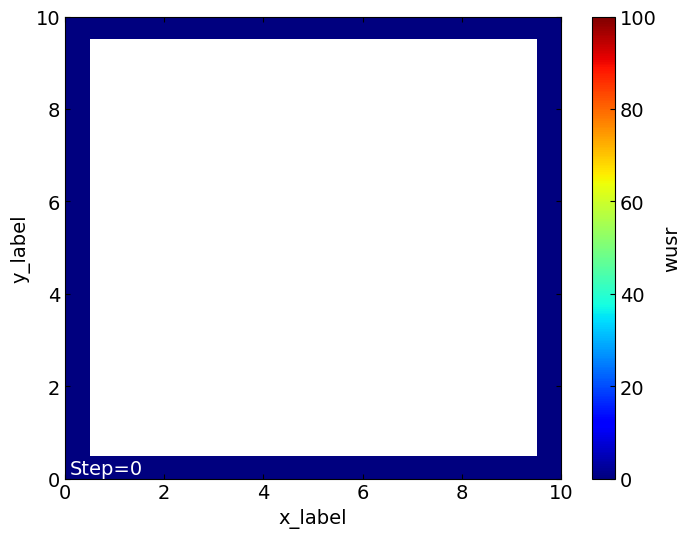

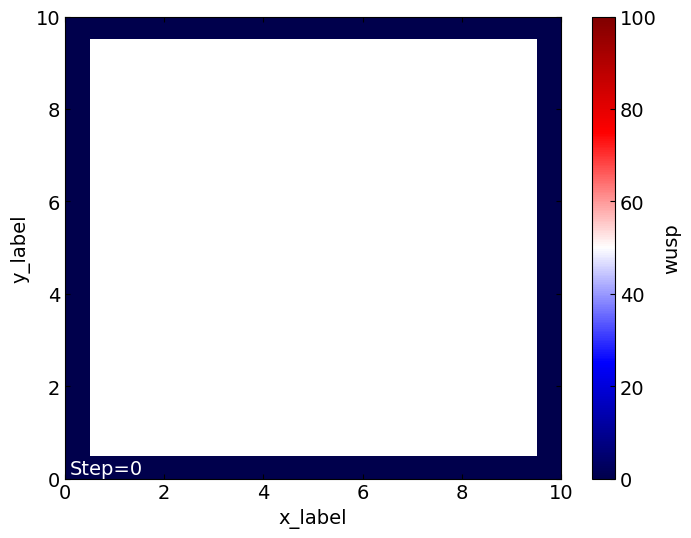

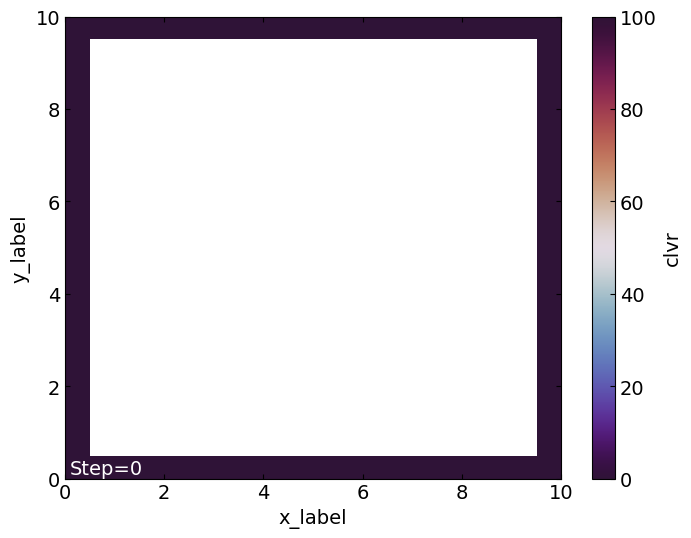

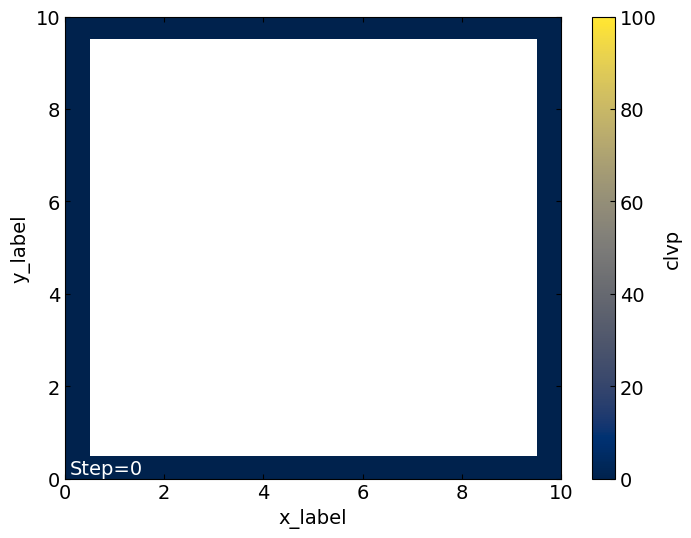

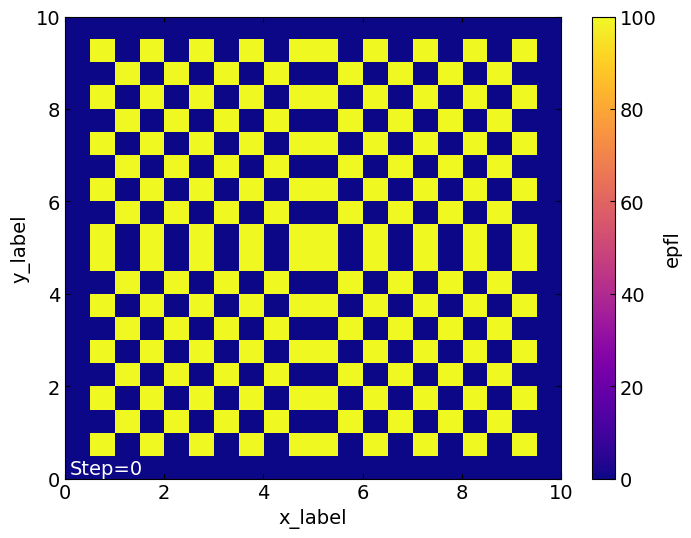

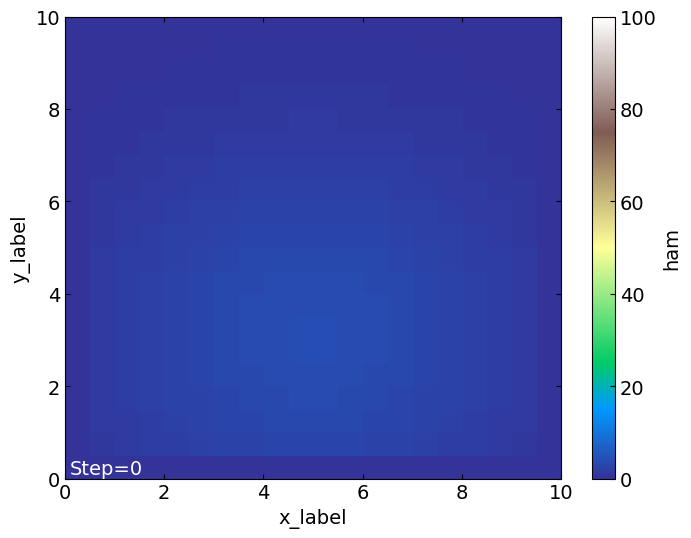

Iteration= 10


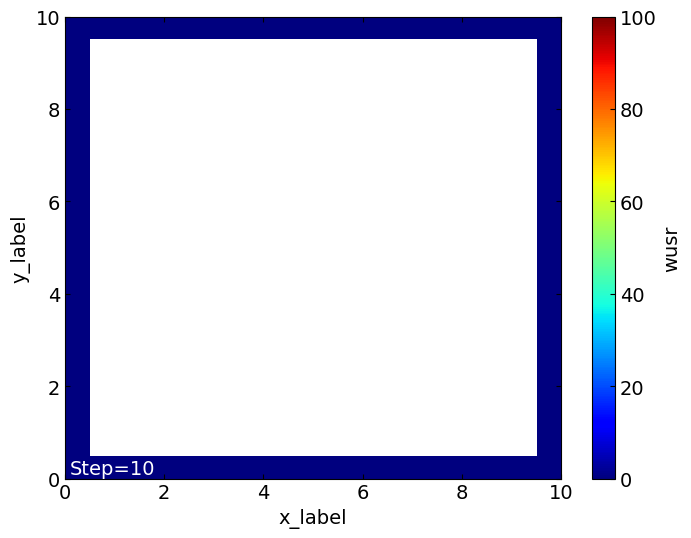

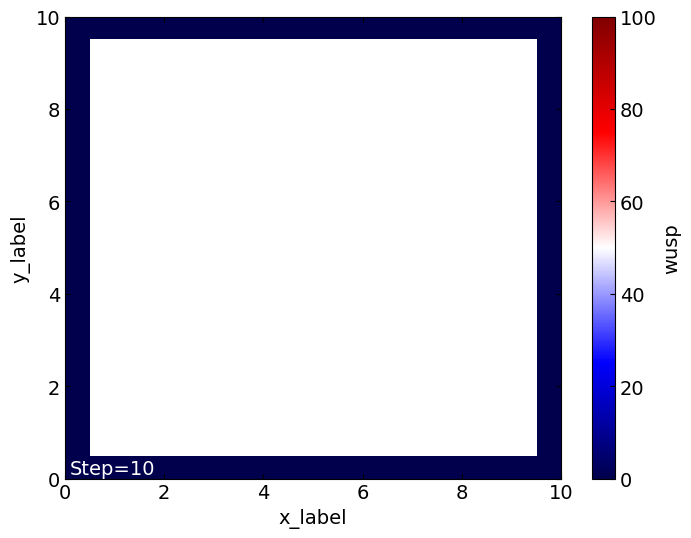

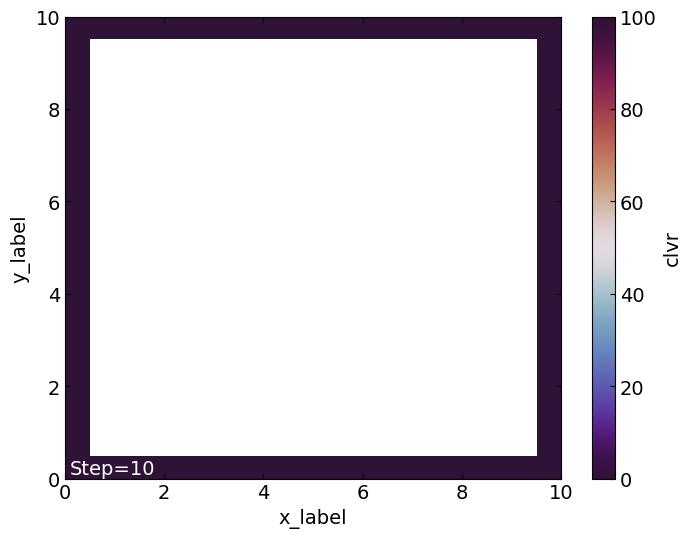

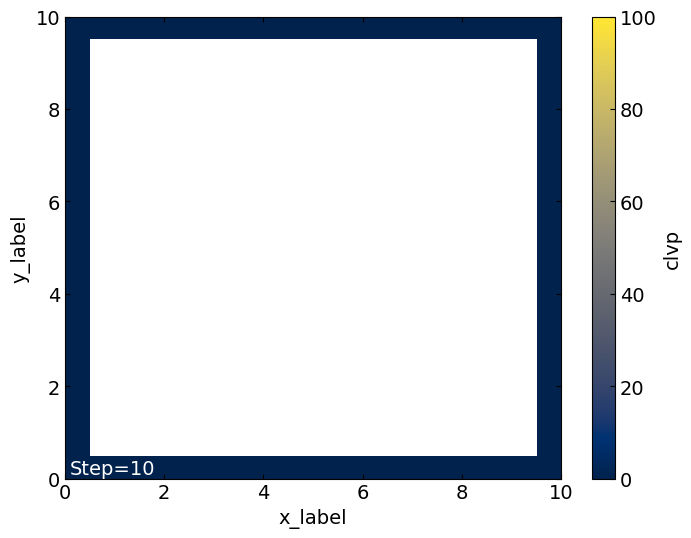

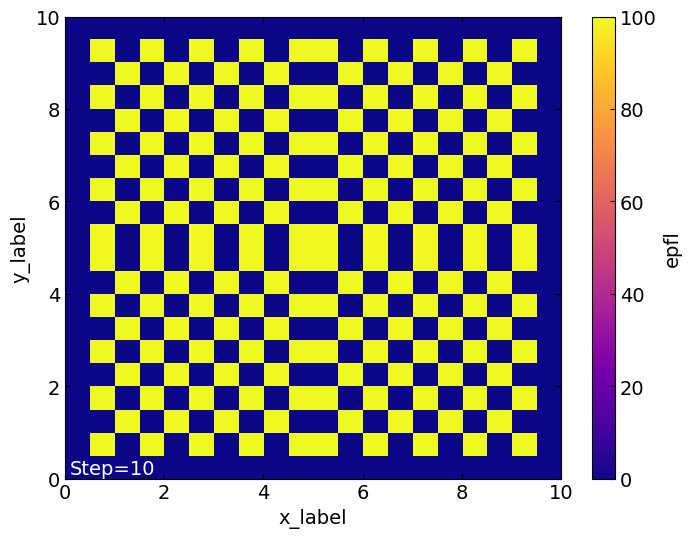

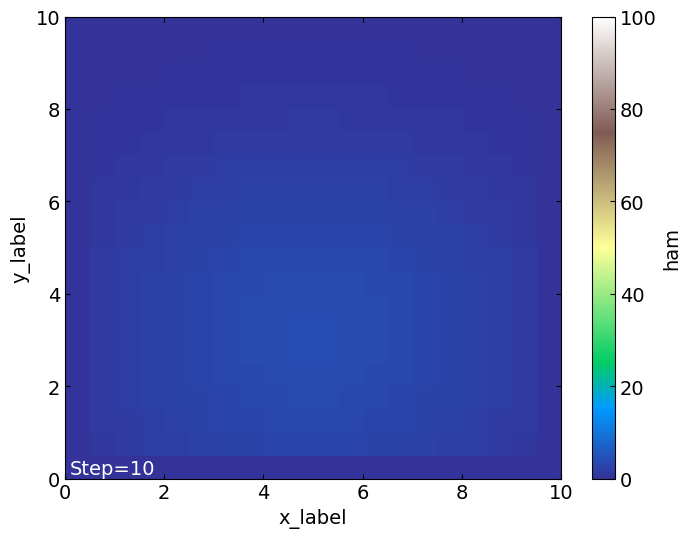

Iteration= 20


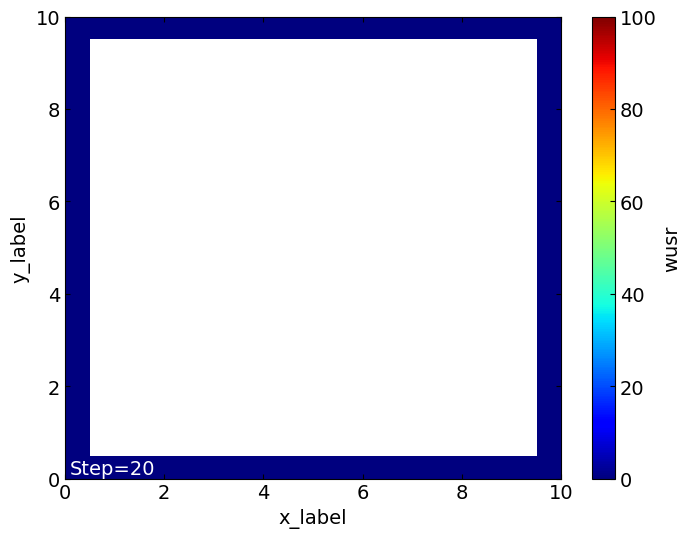

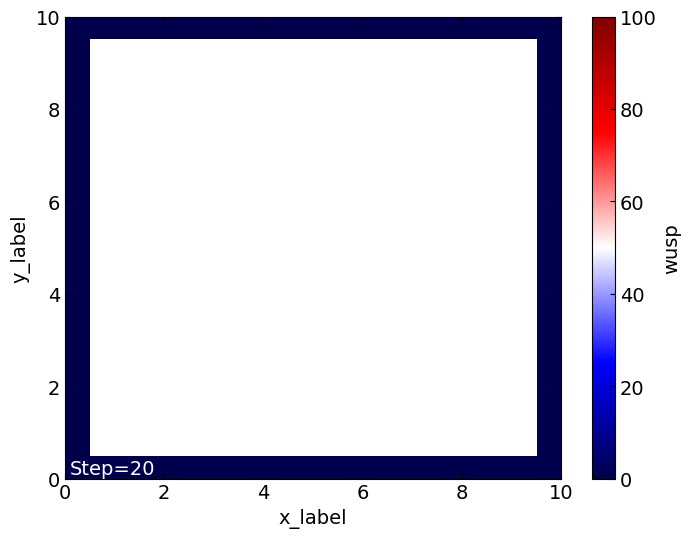

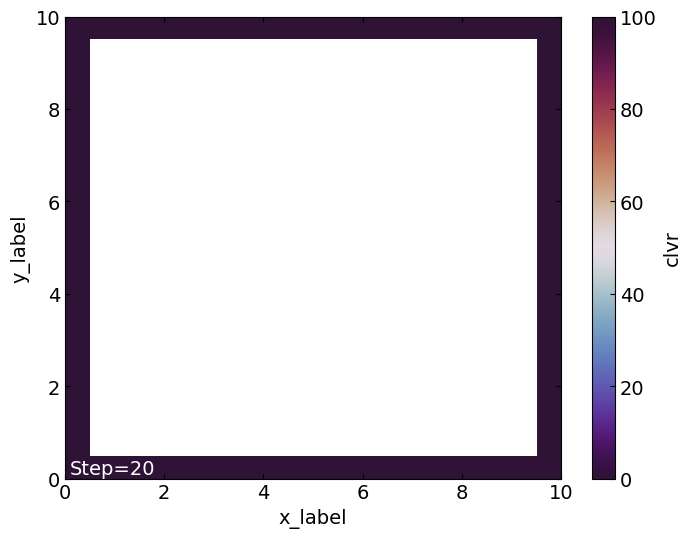

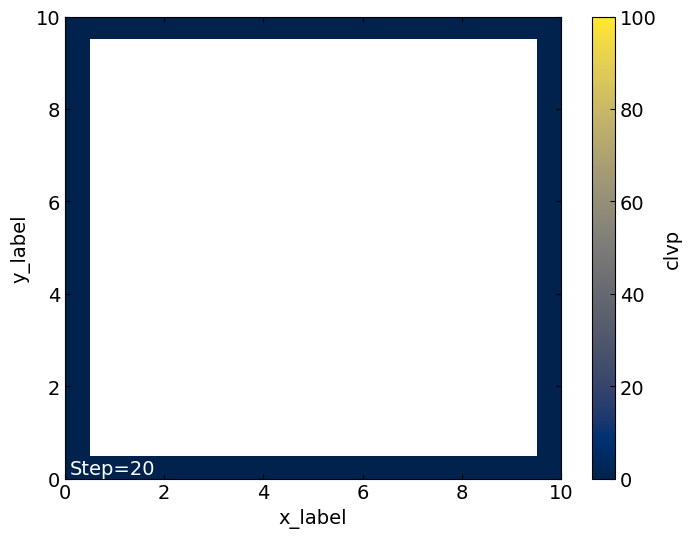

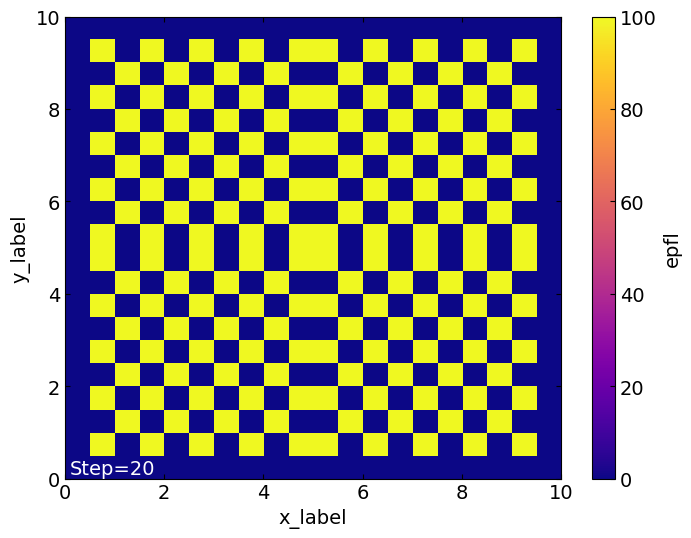

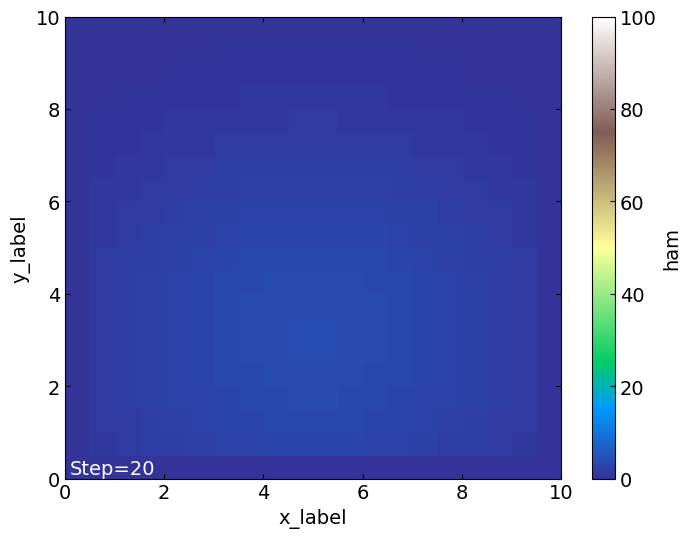

Iteration= 30


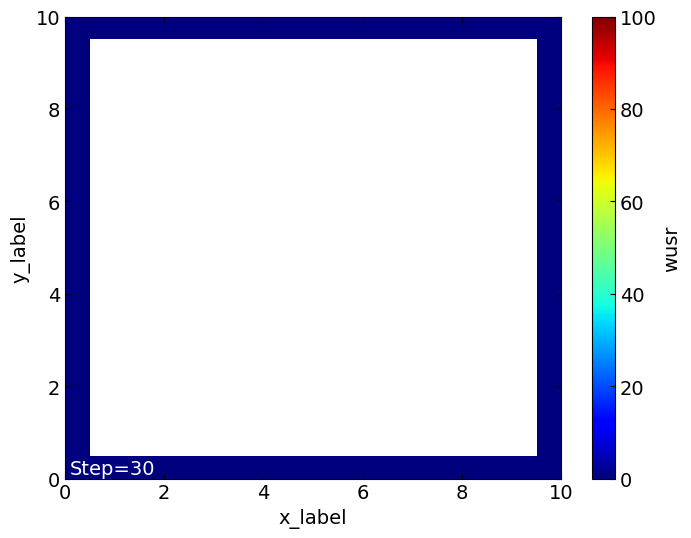

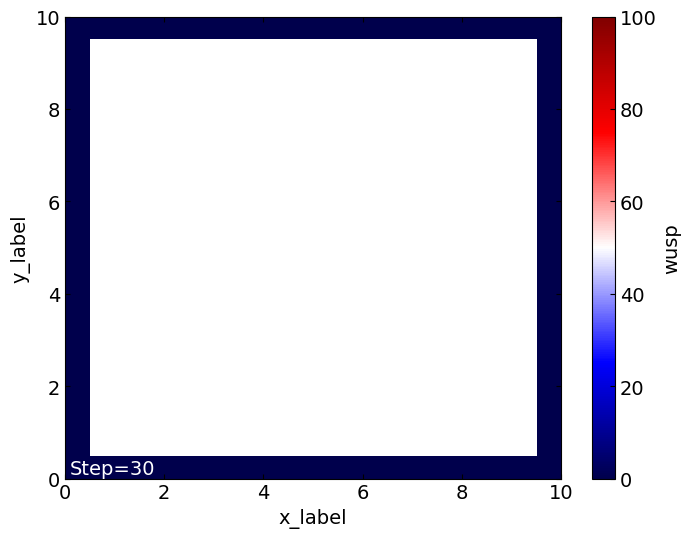

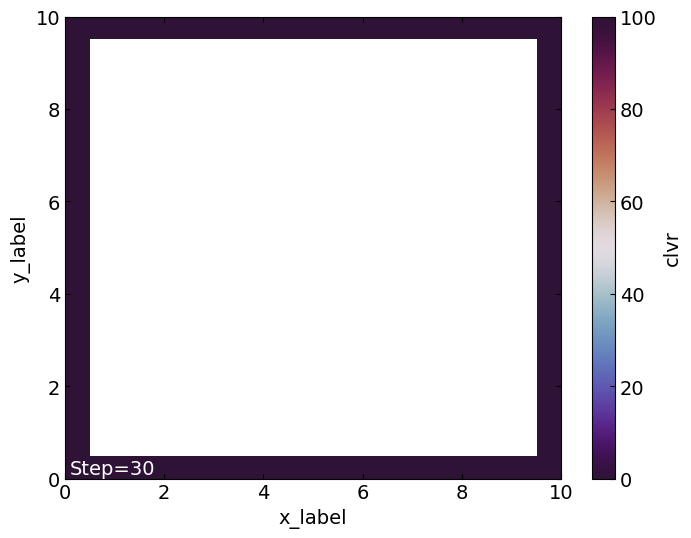

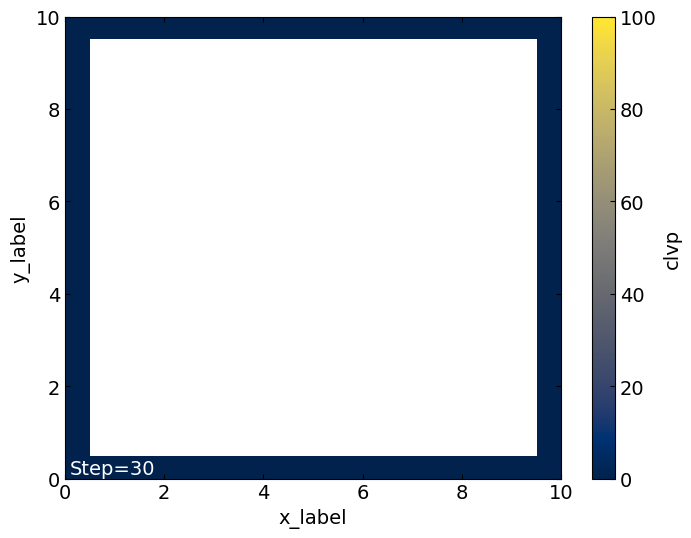

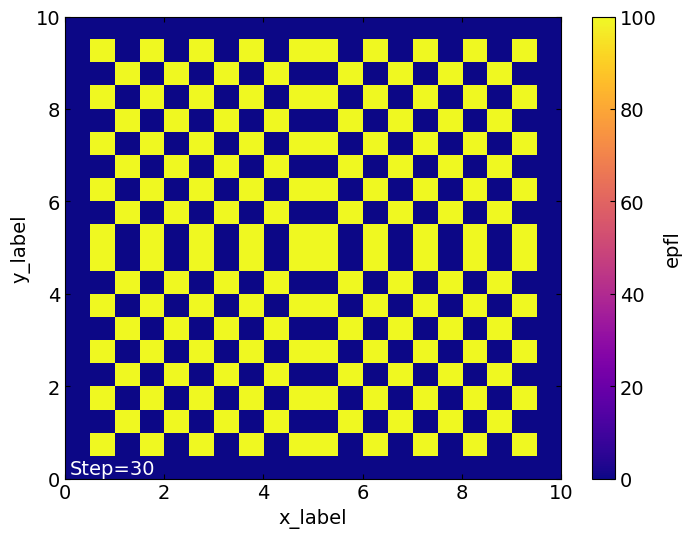

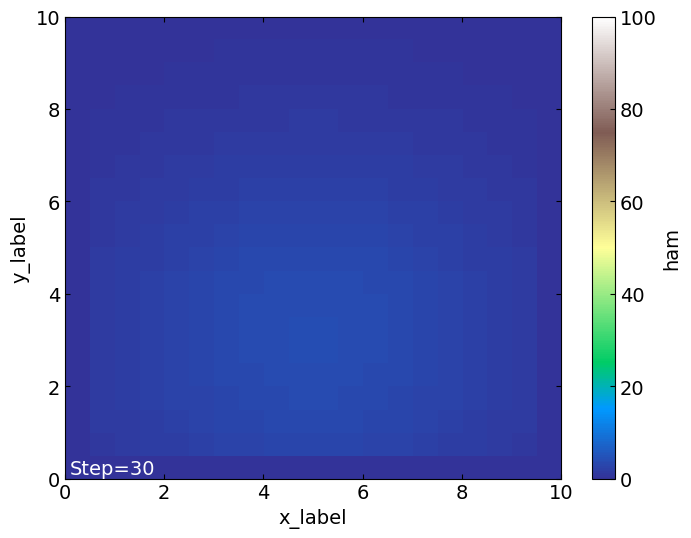

Iteration= 40


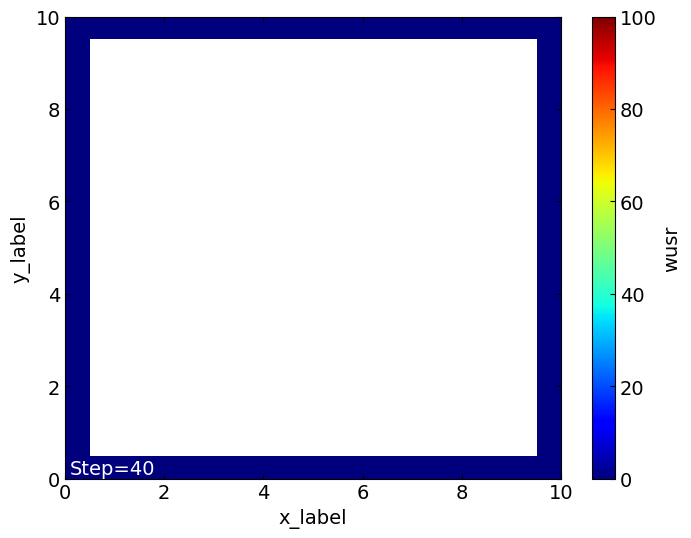

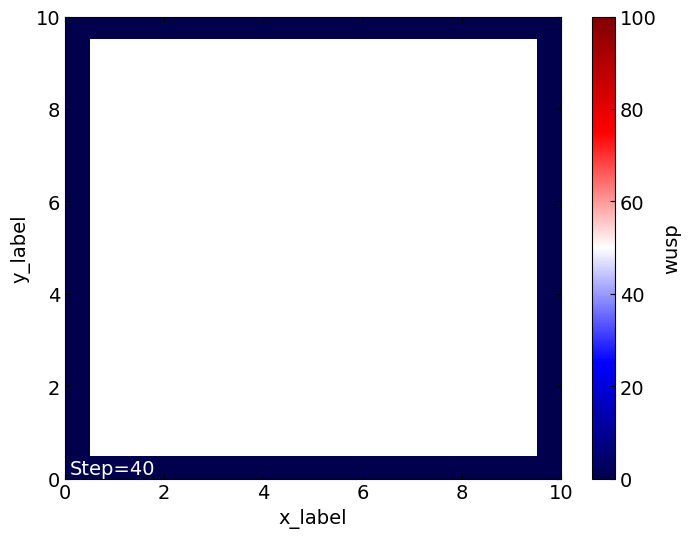

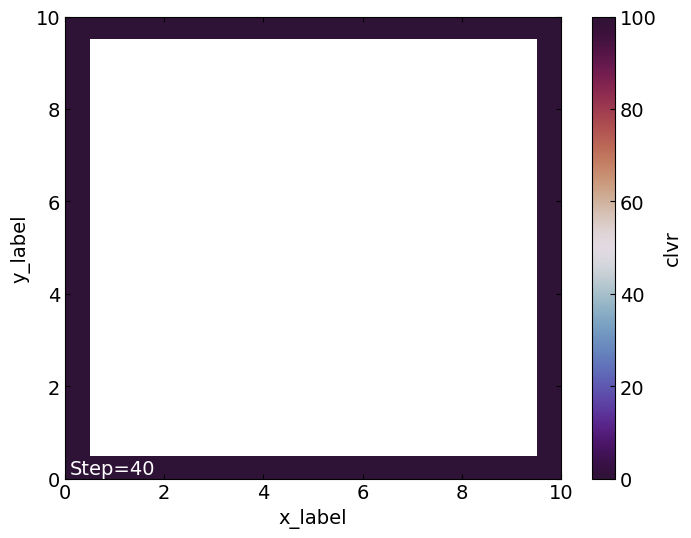

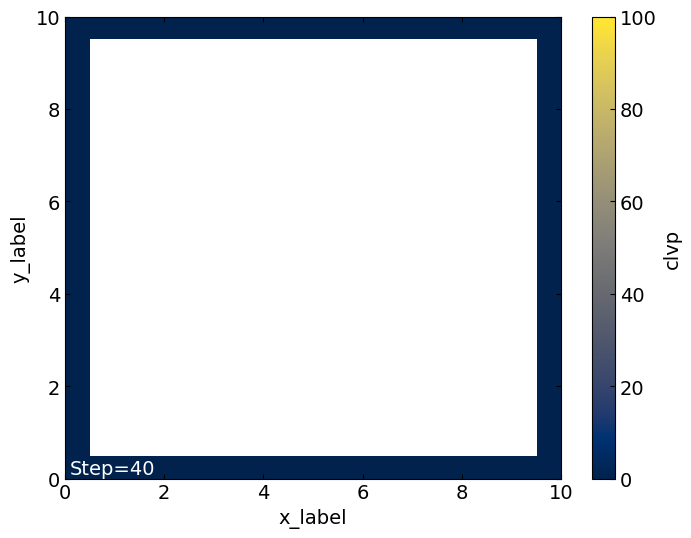

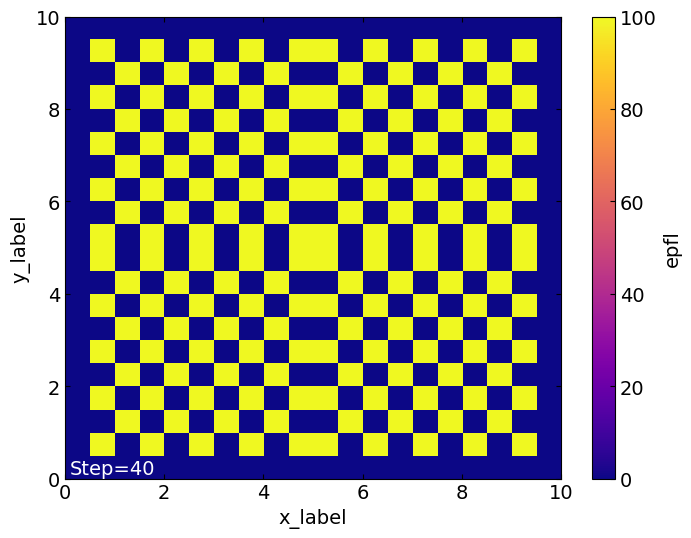

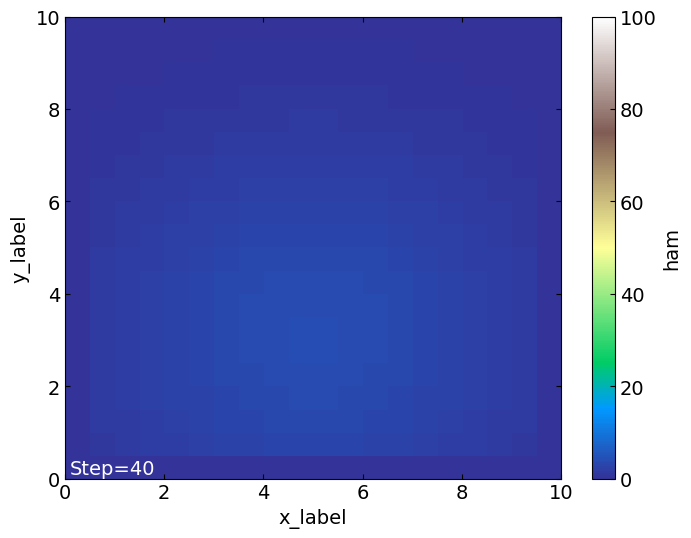

In [ ]:
# Initial
if __name__ == '__main__':
      # 安定性の確認
    nu_x, nu_y = a * dt / dx ** 2, a * dt / dy ** 2
    print('nu_x, nu_y=', nu_x, nu_y)

    # 計算を実行
    sol_2d_diffusion(x, y, wusr, wusp, clvr, clvp, erf, ham, pull_sol, 0)

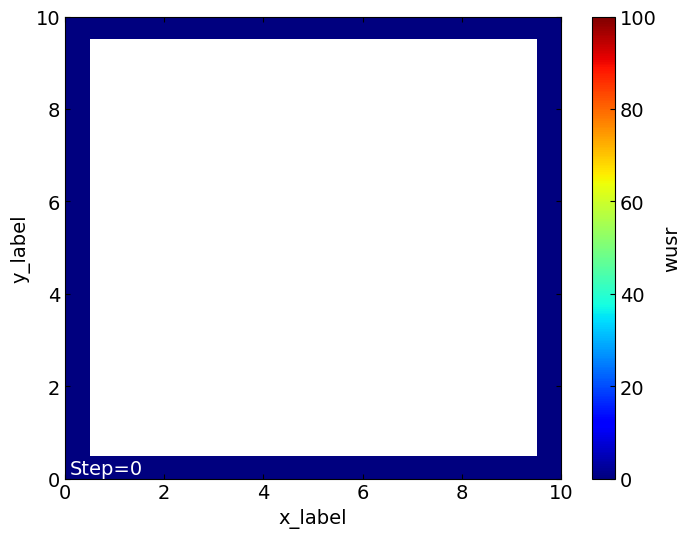

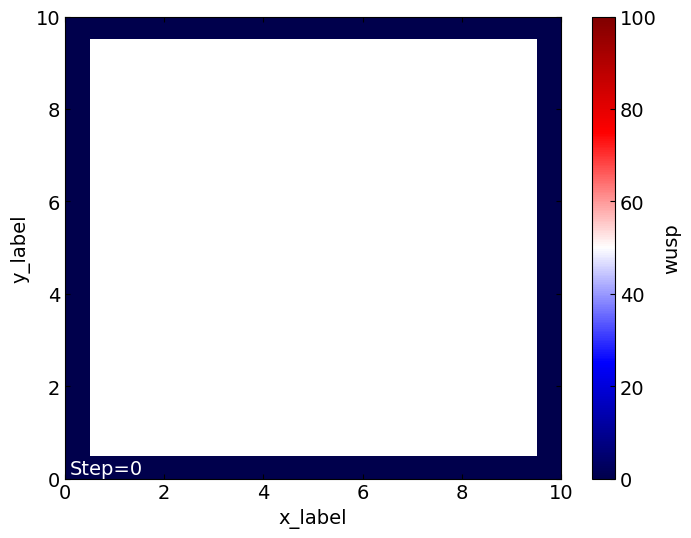

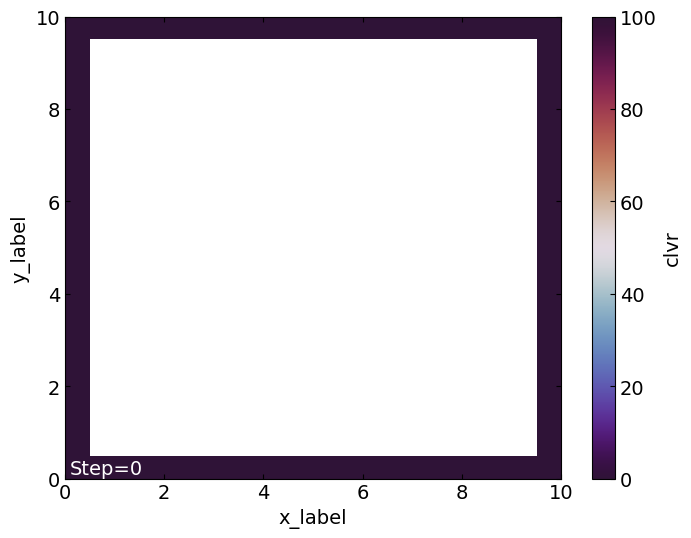

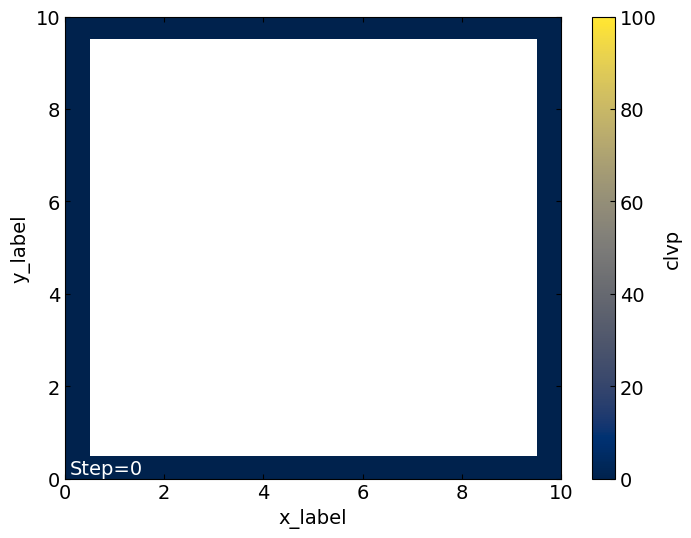

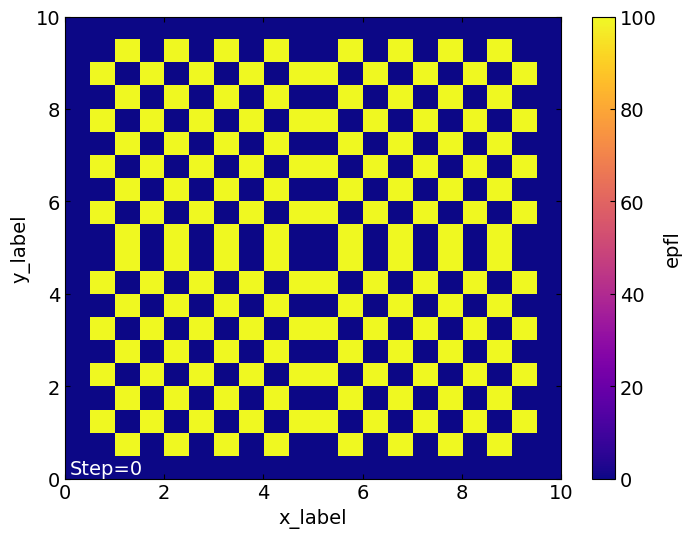

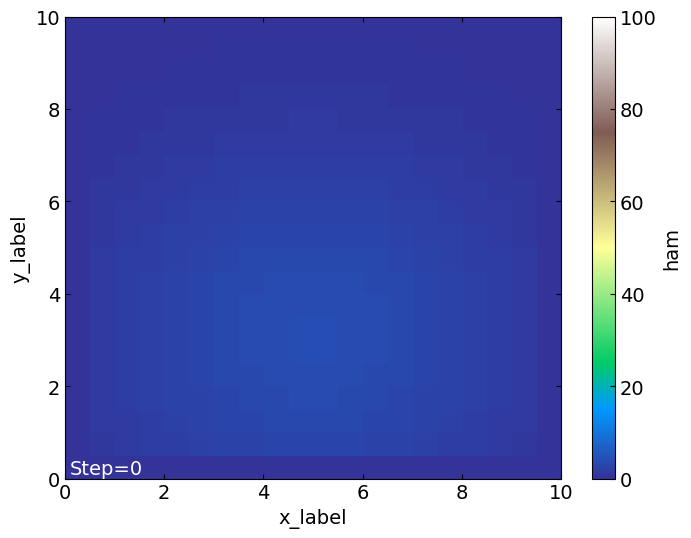

In [ ]:
# Parameter_original
a = 1   # diffusion rate
K_CW = 0.2
n_CW = 6.0
k_Cr = 0.5
K_CL = 0.24
n_CL = 6.0
K_CH = 0.13
n_CH = 5.0
k_Cp = 2.7
b_Cr  = 1.0
b_Wr = 0.5
k_WL = 1.0
k_WC = 1.0
k_Wr = 1.2
K_WW = 0.53
n_WW = 0.2
K_WL = 0.29
n_WL = 6.0
K_WC = 0.1
n_WC = 6.0
k_Wp = 0.345
b_Ww  = 0.4
b_Wr = 1.0
ki_W = 0.3
a_Cc  = 0
K_HW = 0.3
n_HW = 4.0
b_pp = 1.0
k_pp = 1.0
b_Hh = 1.0
k_Hh = 1.0
k_Ll = 10
b_Ll = 1.5
D_Ww = 1.0
D_Cc = 6.0
D_Ll = 1.2

# 境界条件を設定する

wusr = boundary_condition(wusr)
wusp = boundary_condition(wusp)
clvr = boundary_condition(clvr)
clvp = boundary_condition(clvp)
erf = boundary_condition(erf)
ham = boundary_condition(ham)

plot(x, y, wusr, 0, wusr_str, c_wusr, 0)
plot(x, y, wusp, 0, wusp_str, c_wusp, 0)
plot(x, y, clvr, 0, clvr_str, c_clvr, 0)
plot(x, y, clvp, 0, clvp_str, c_clvp, 0)
plot(x, y, erf, 0, erf_str, c_erf, 0)
plot(x, y, ham, 0, ham_str, c_ham, 0)


In [ ]:
# Space
x_max, y_max = 10, 10  # range
dx, dy = 0.5, 0.5  # divide

# Initial
wr_sigma11, wr_sigma22, wr_sigma12, wr_sigma21 = 9000, 3000, 0, 0
wp_sigma11, wp_sigma22, wp_sigma12, wp_sigma21 = 900, 300, 0, 0
cr_sigma11, cr_sigma22, cr_sigma12, cr_sigma21 = 5000, 1500, 0, 0
cp_sigma11, cp_sigma22, cp_sigma12, cp_sigma21 = 500, 150, 0, 0
e_sigma11, e_sigma22, e_sigma12, e_sigma21 = 600, 300, 0, 0
h_sigma11, h_sigma22, h_sigma12, h_sigma21 = 10, 10, 0, 0

mu_wusr_x, mu_wusr_y = 5, 8
mu_wusp_x, mu_wusp_y = 5, 8
mu_clvr_x, mu_clvr_y = 5, 2
mu_clvp_x, mu_clvp_y = 5, 2
mu_erf_x, mu_erf_y = 5, 5
mu_ham_x, mu_ham_y = 5, 7

# Amplifier
wr_AMP = 1000
wp_AMP = 1000
cr_AMP = 1000
cp_AMP = 1000
e_AMP  = 1000
h_AMP  = 100

a = 1   # diffusion rate

# Calculation condition
dt = 0.0005  # Time
step = 50
result_interval = 10


# Save condition  1=save, 0=not save

#plsv_wusr, plsv_wusp, plsv_clvr, plsv_clvp, plsv_erf, plsv_ham = 0, 0, 0, 0, 0, 0
plsv_wusr, plsv_wusp, plsv_clvr, plsv_clvp, plsv_erf, plsv_ham = 1, 1, 1, 1, 1, 1

# component
wusr_str, wusp_str, clvr_str, clvp_str, erf_str, ham_str = 'wusr', 'wusp', 'clvr', 'clvp', 'epfl', 'ham'
c_wusr, c_wusp, c_clvr, c_clvp, c_erf, c_ham = 'jet', 'seismic', 'twilight_shifted', 'cividis', 'plasma', 'terrain'
# , , , , 'gist_stern', 'gnuplot',,, 'brg''gnuplot2' 'CMRmap''cubehelix'


#引数list
pull_sol = [dt, dx, dy, a, step, result_interval]

# Initial field
x, y = np.linspace(0, x_max, int(x_max / dx)), np.linspace(0, y_max, int(y_max / dy))
wusr, wusp, clvr, clvp, erf, ham = initial_field(x, y)
#plot(x, y, wus, 0, dir, 0)

1.0
Iteration= 0


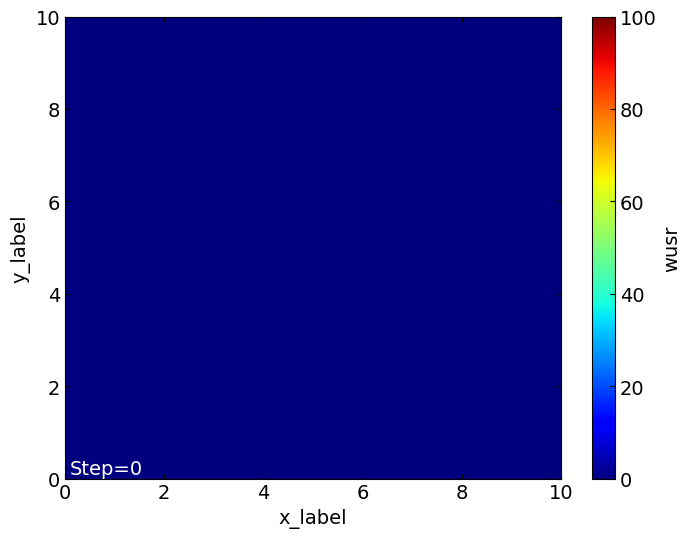

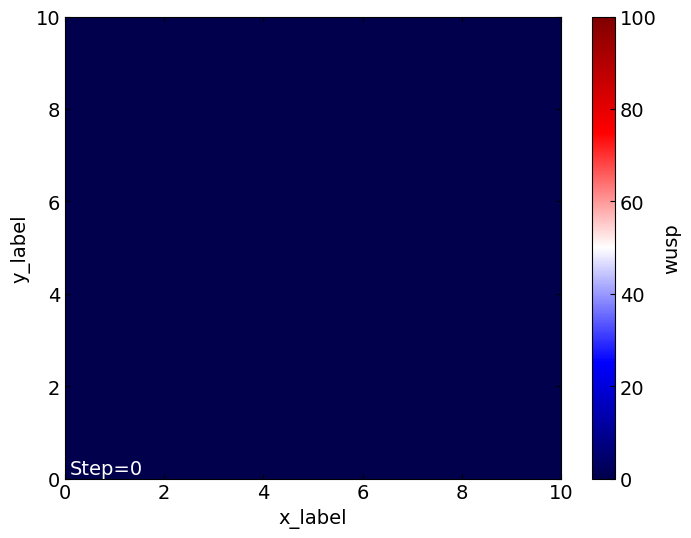

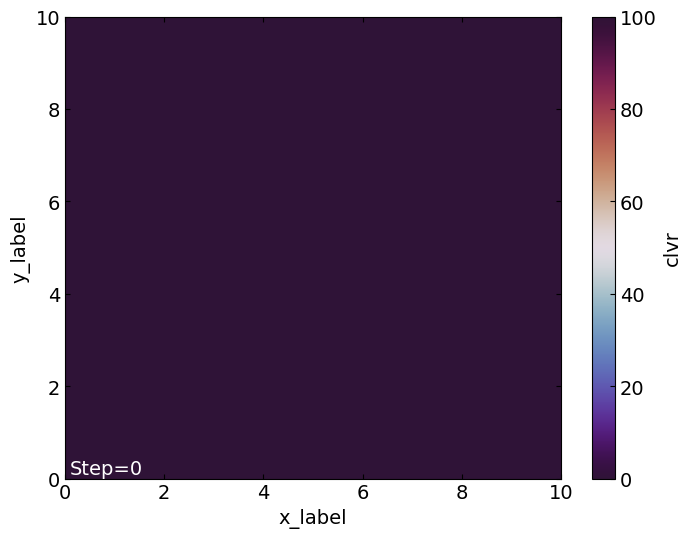

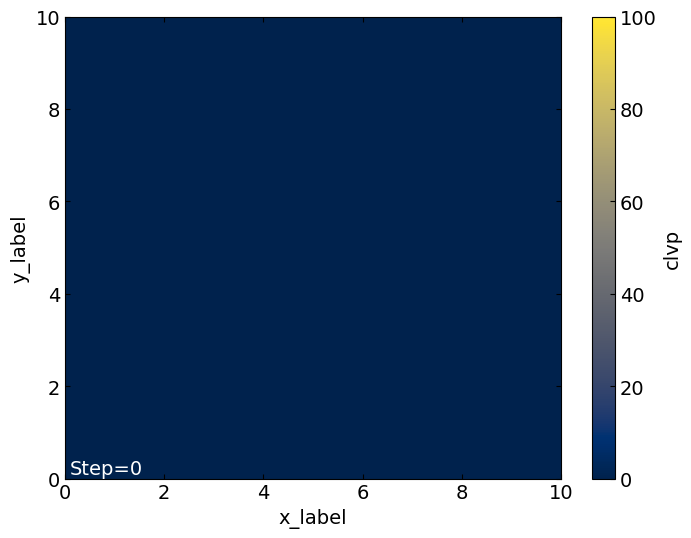

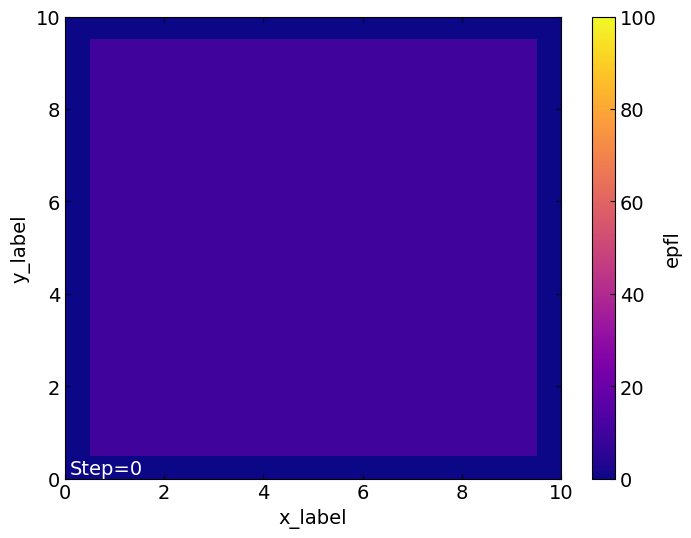

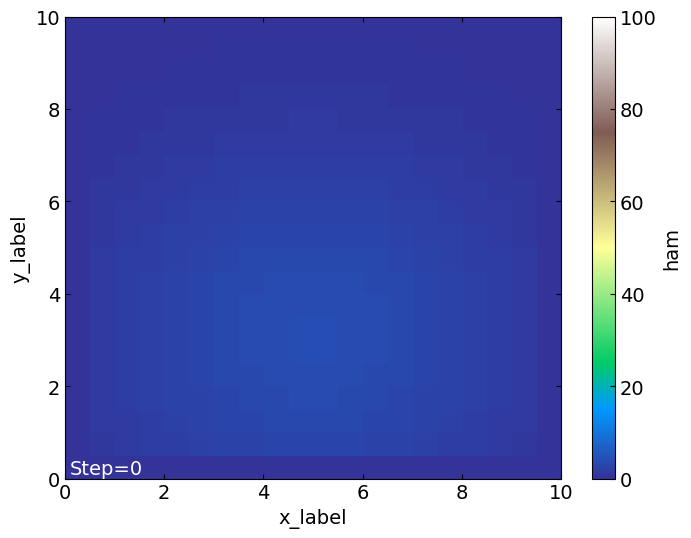

Iteration= 10


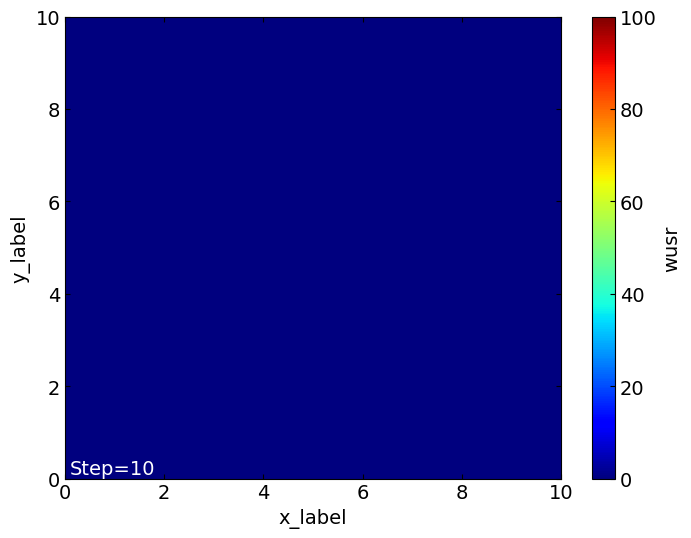

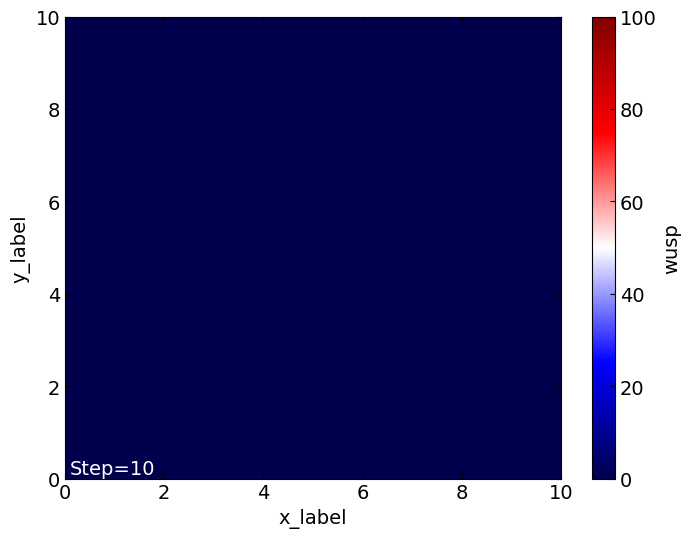

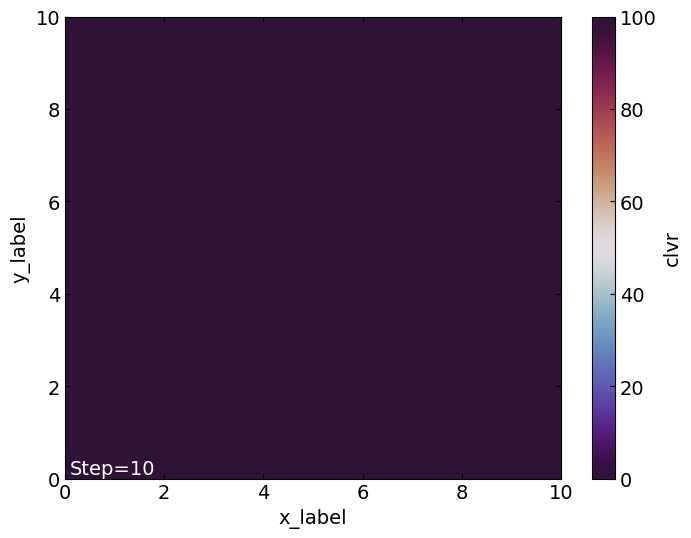

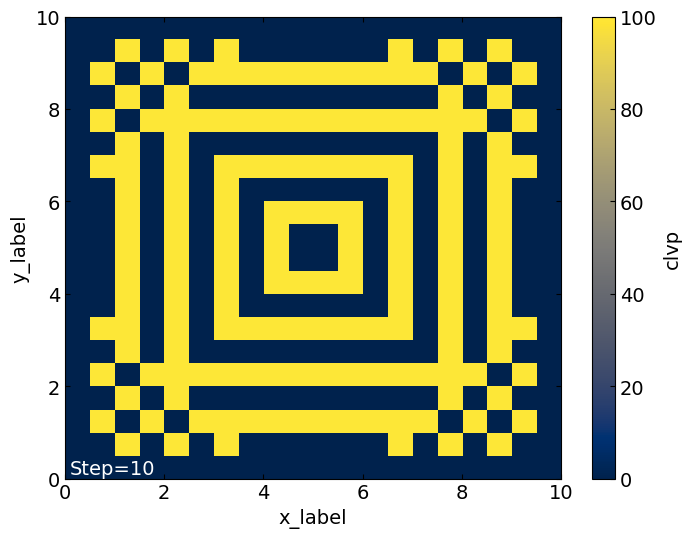

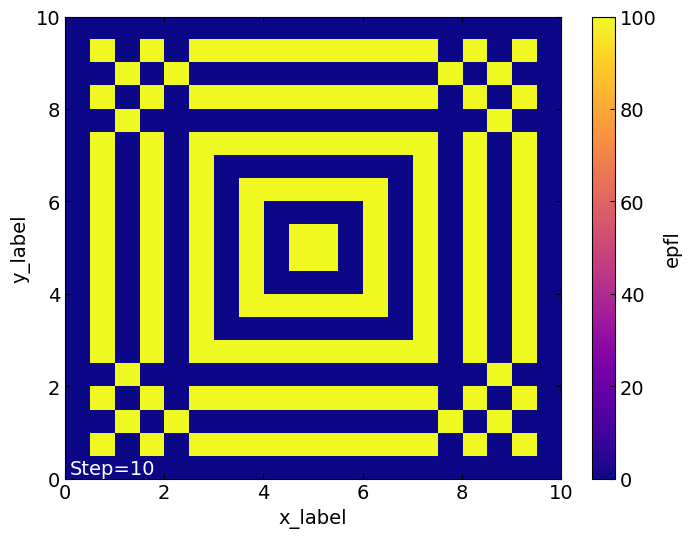

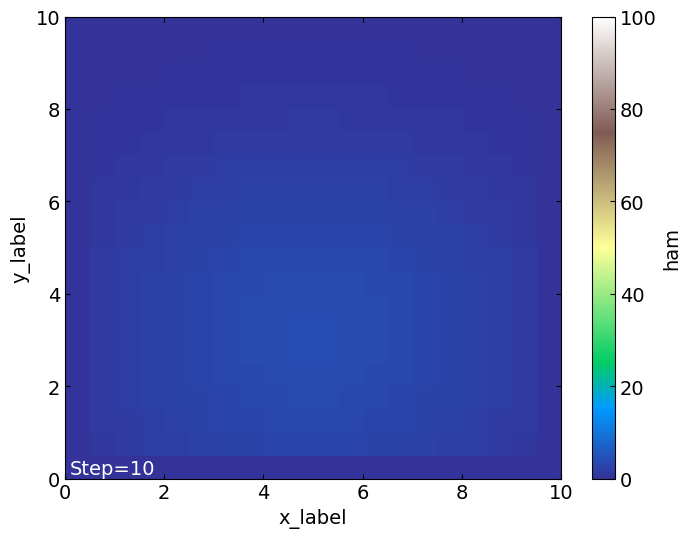

Iteration= 20


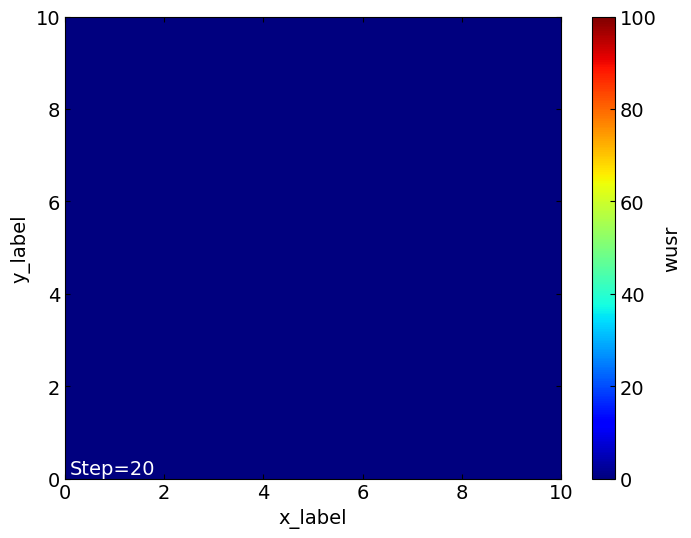

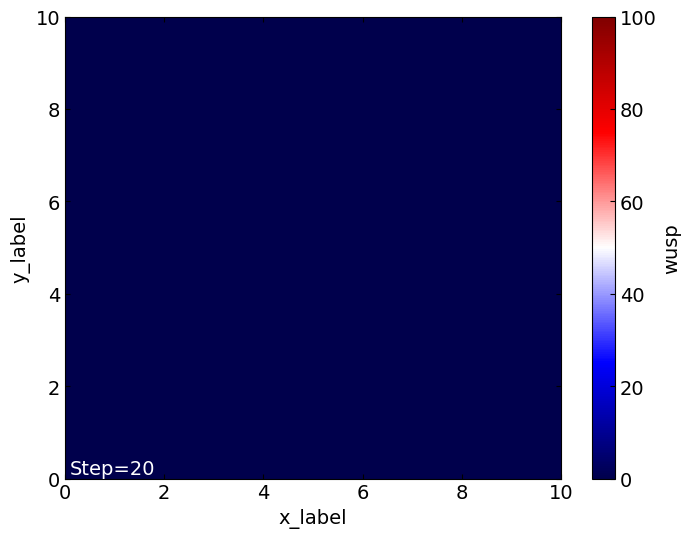

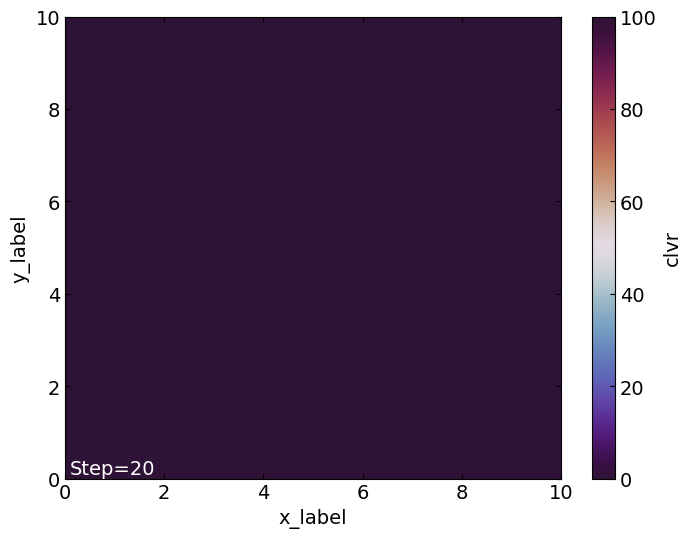

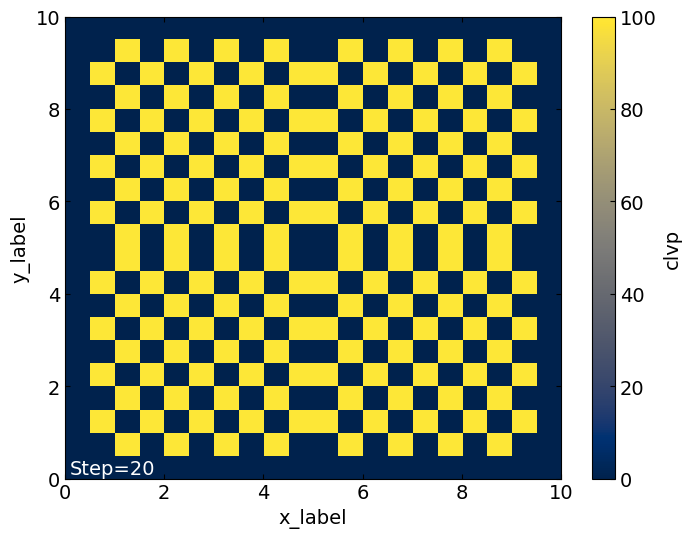

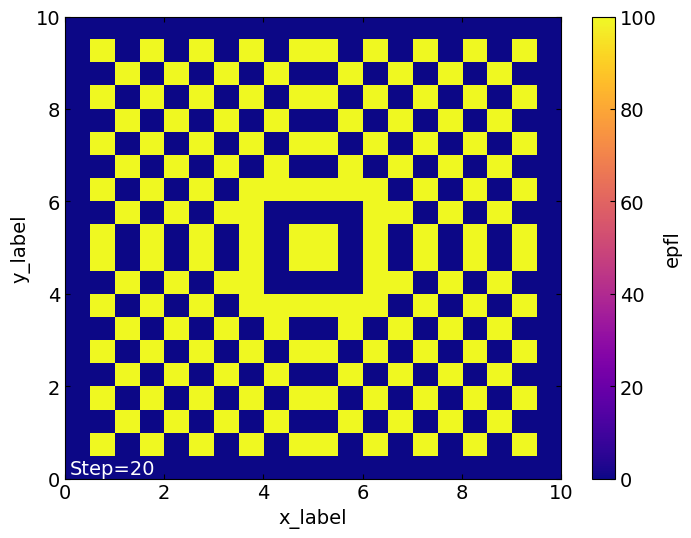

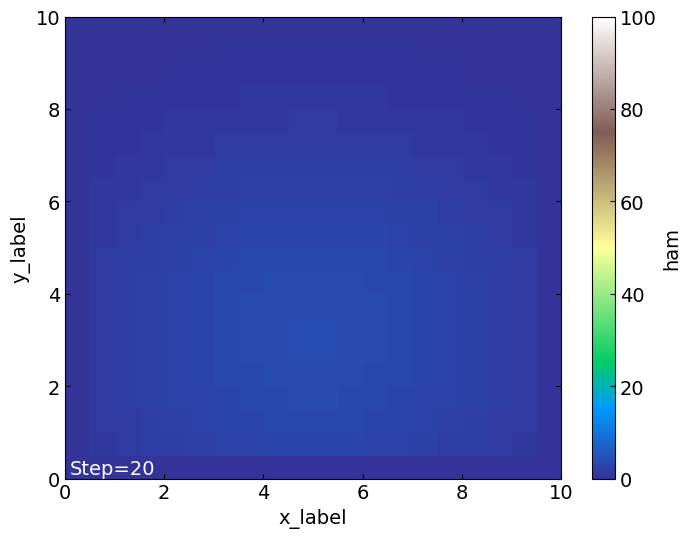

Iteration= 30


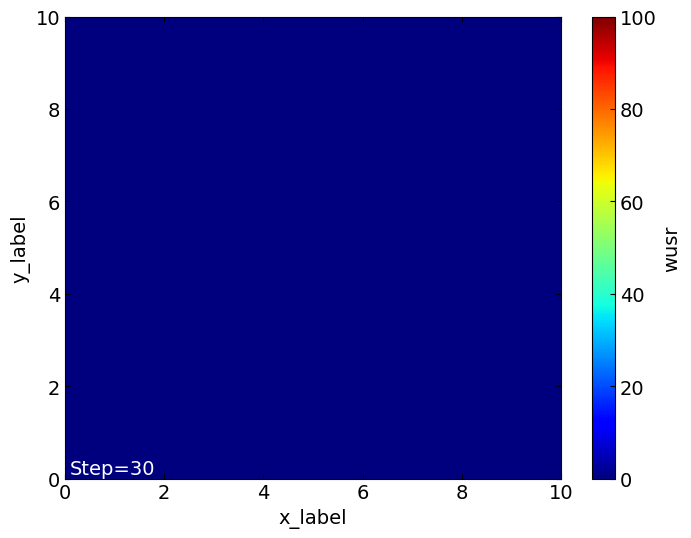

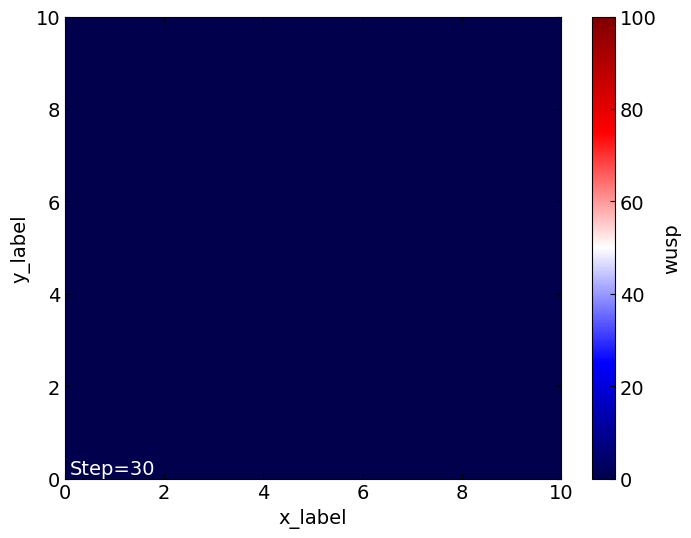

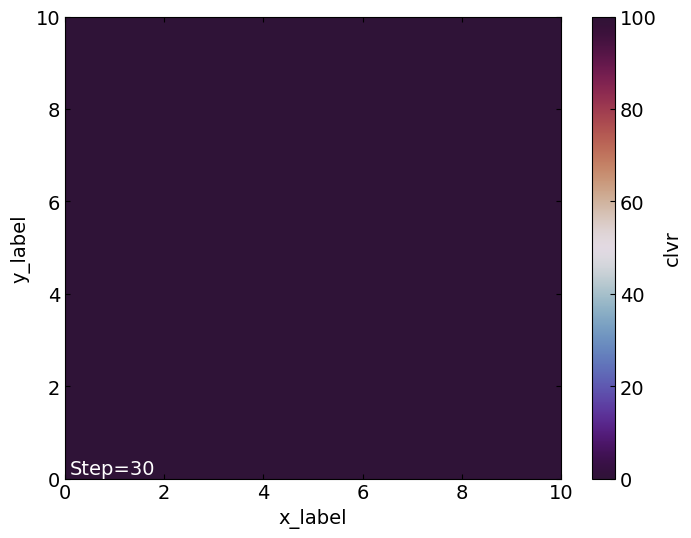

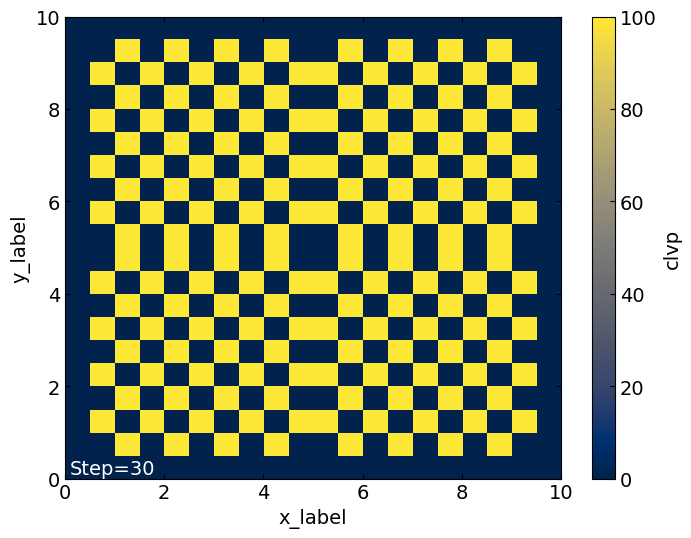

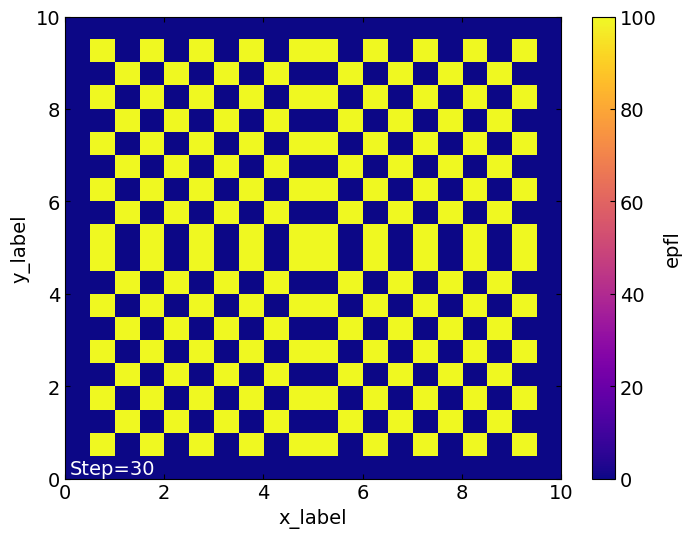

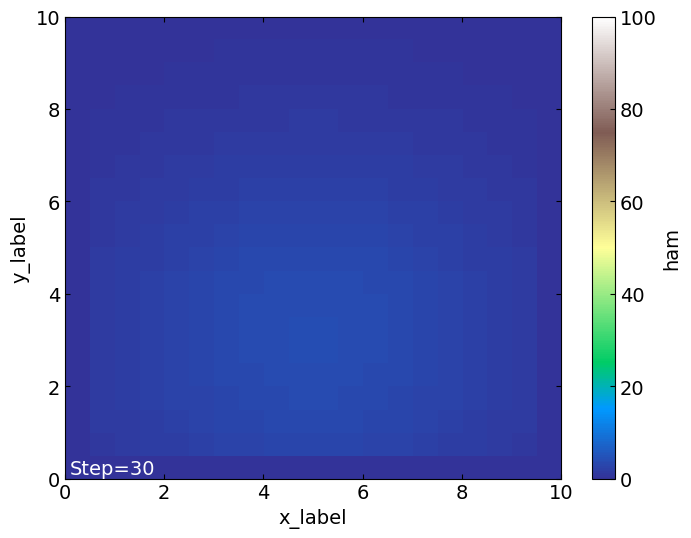

<ipython-input-12-6a3c1bfac452>:23: RuntimeWarning: overflow encountered in scalar power
  wusr[i, j] = k_Wr * ((k_WL/(1 + (erf0[i, j] / K_WL)**n_WL)) + (k_WC/(1+(clvp0[i, j] / K_WC )**n_WC))) * (ki_W + ((wusp0[i, j] / K_WW)**n_WW / (1+(wusp0[i, j] / K_WW)**n_WW)))  - b_Wr * wusr0[i, j]


Iteration= 40


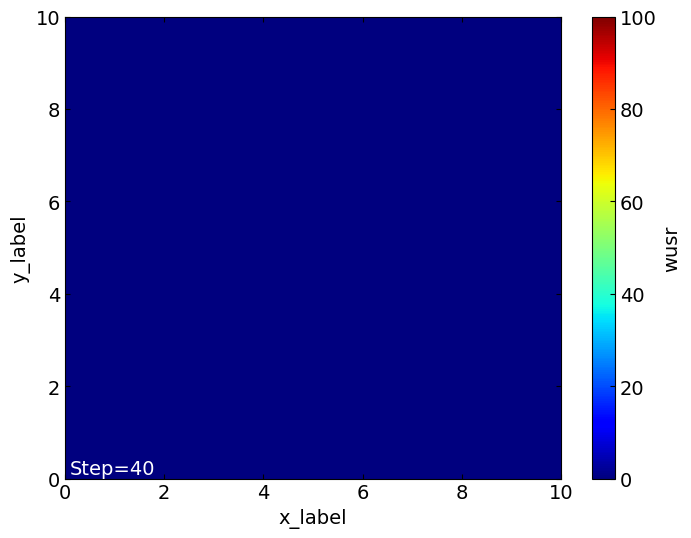

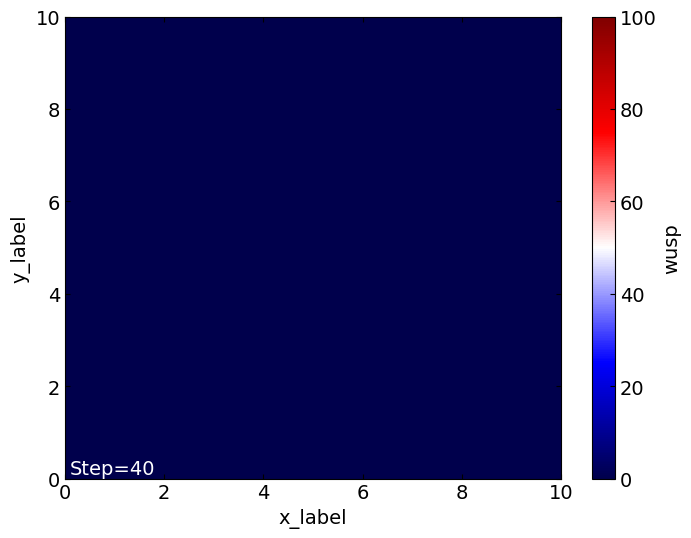

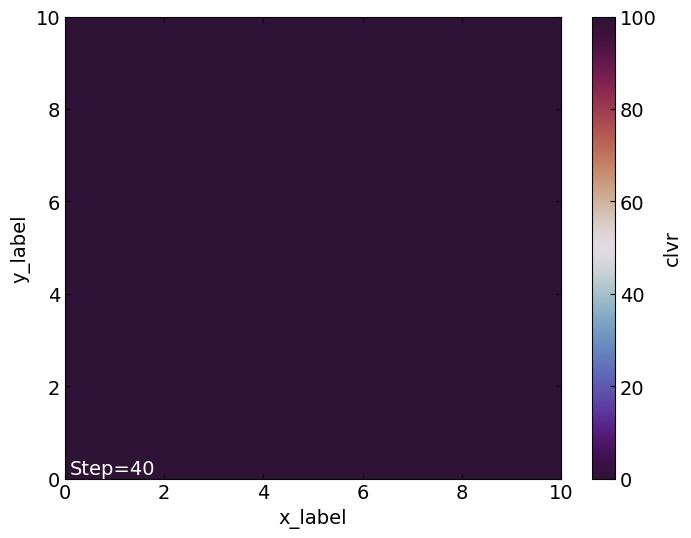

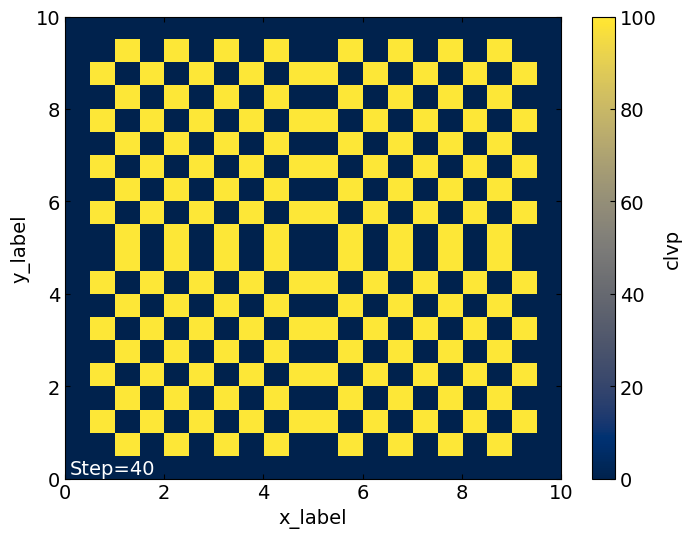

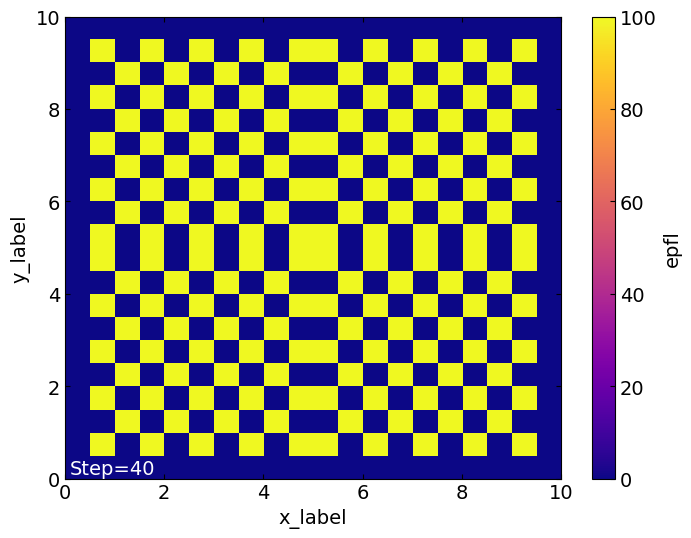

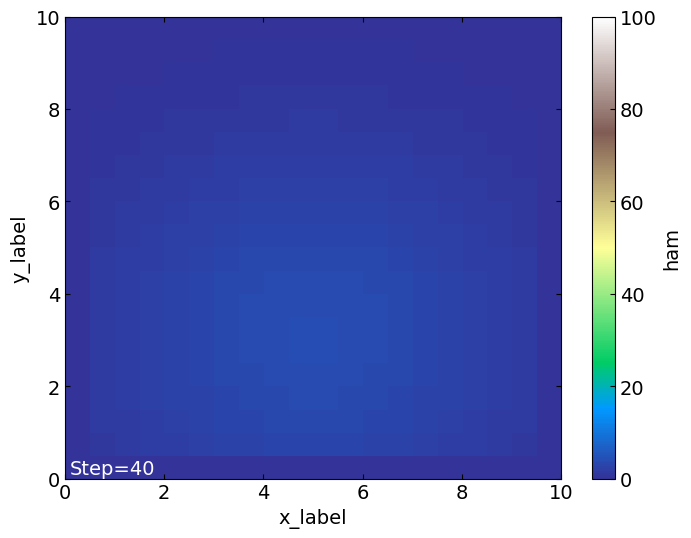

2.0
Iteration= 0


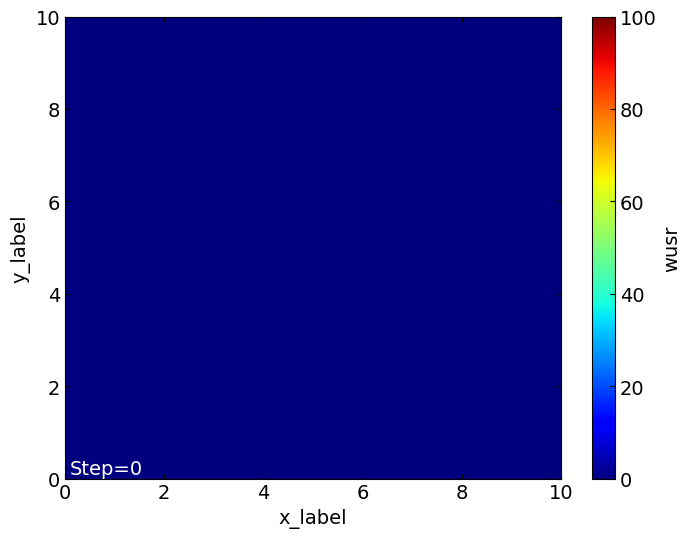

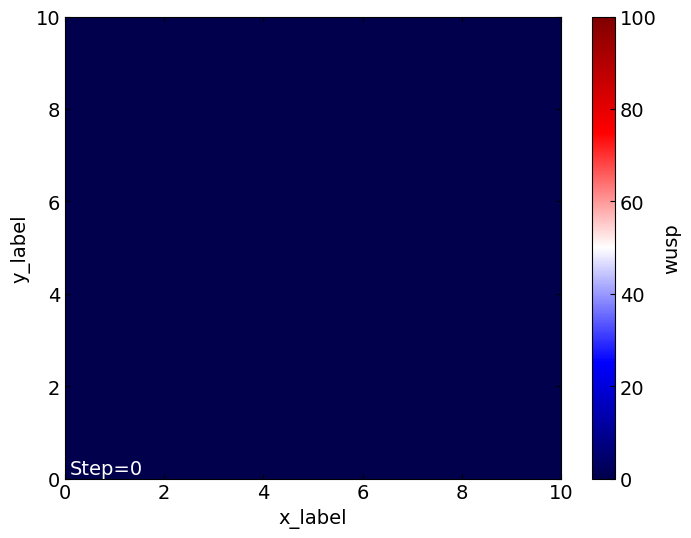

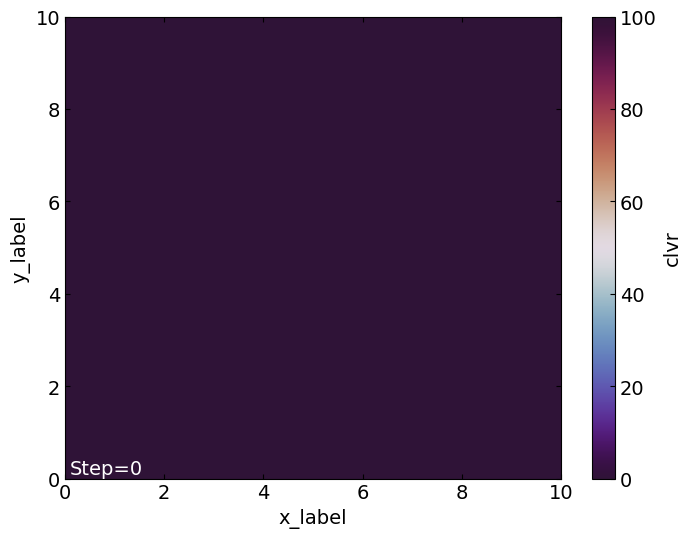

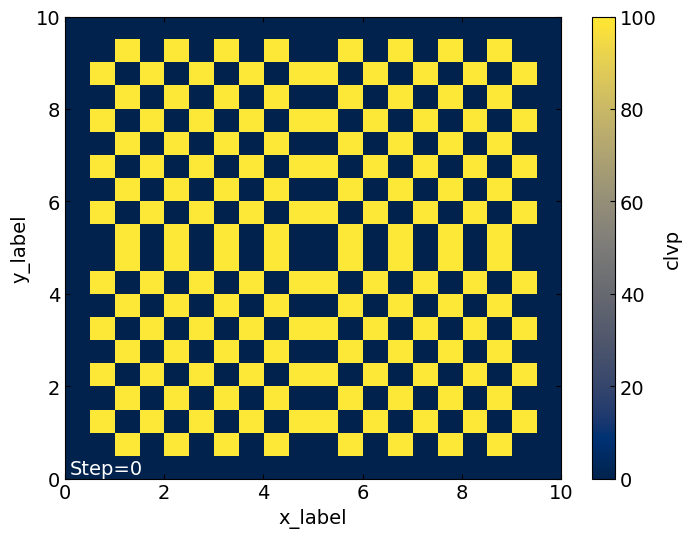

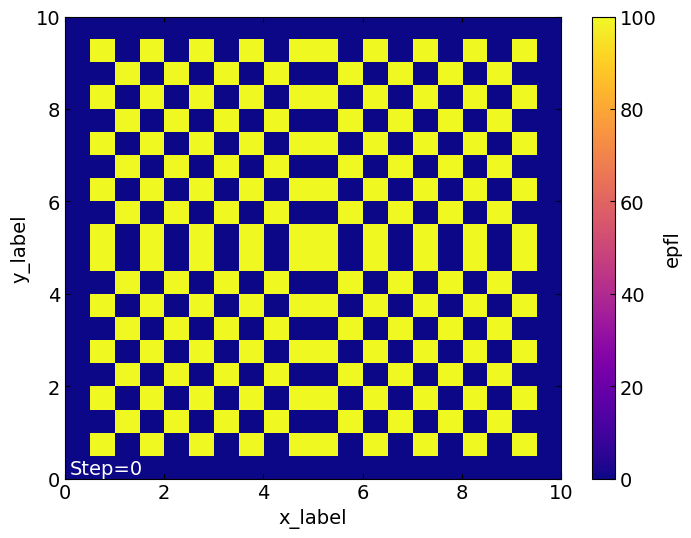

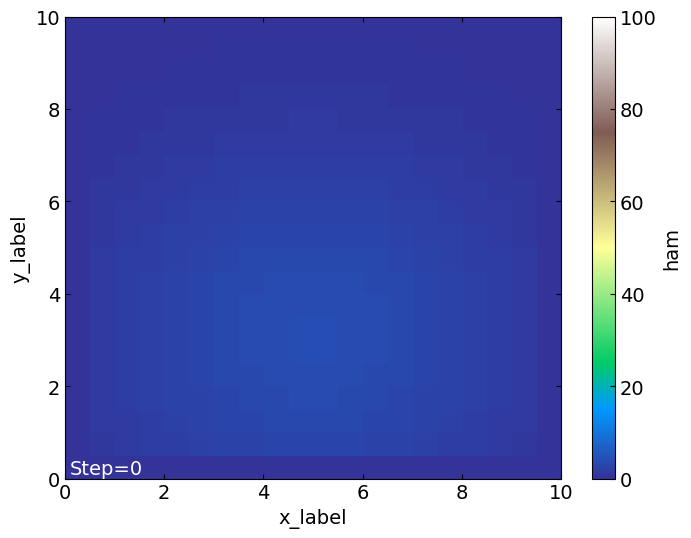

<ipython-input-12-6a3c1bfac452>:25: RuntimeWarning: overflow encountered in scalar power
  clvr[i, j] = (k_Cr / (1+(erf0[i, j]/K_CL)**n_CL)) * (a_Cc + ((wusp0[i, j]/K_CW)**n_CW / (1 + (wusp0[i, j]/K_CW)**n_CW))) * (1/(1+(ham0[i, j]/K_CH)**n_CH))  - b_Cr * clvr0[i, j]


Iteration= 10


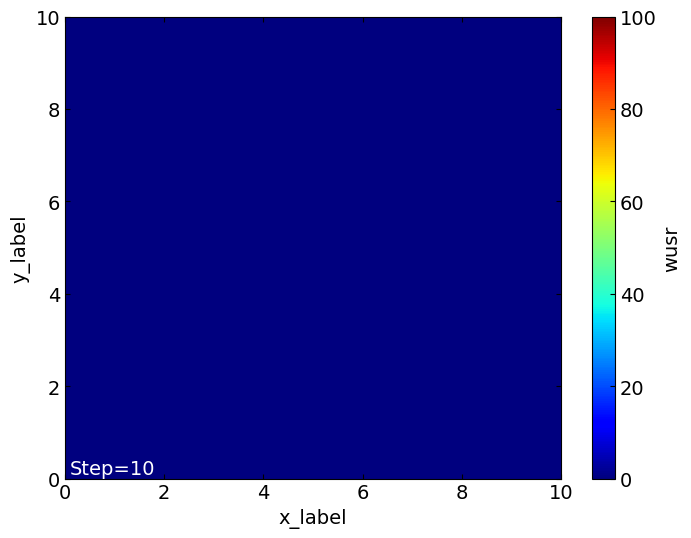

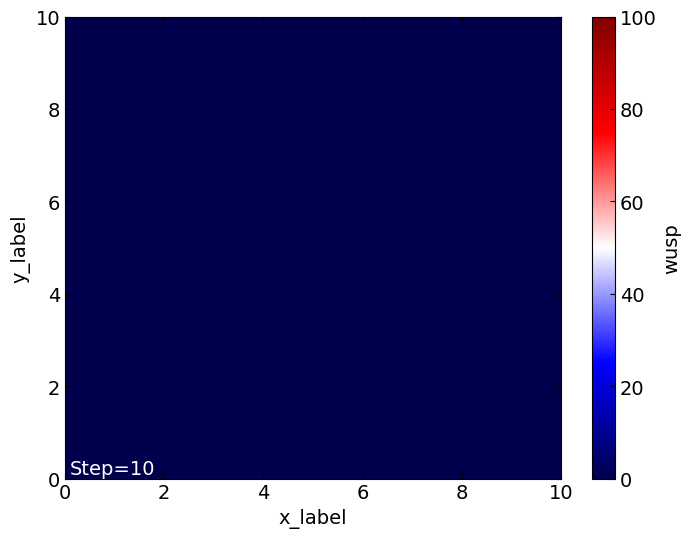

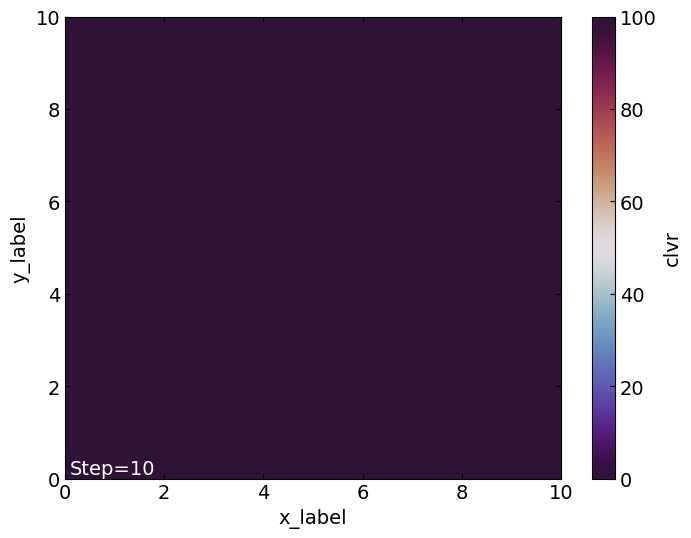

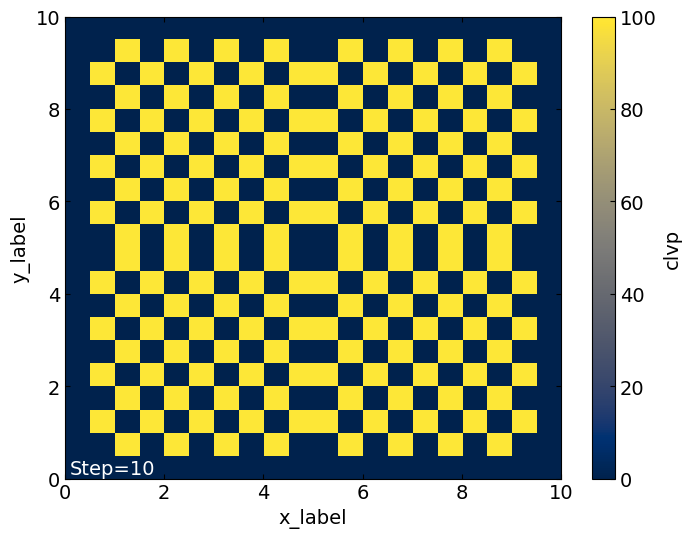

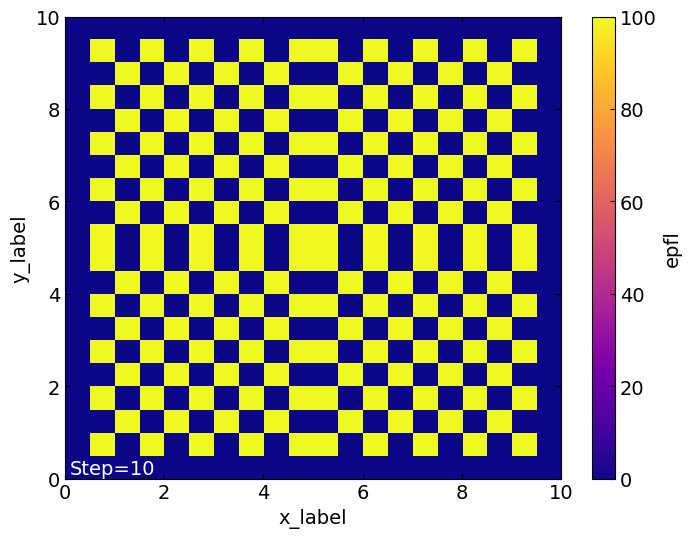

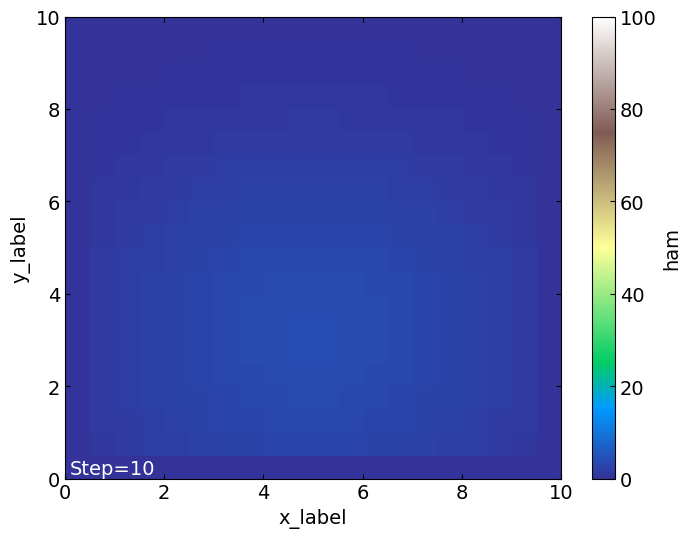

Iteration= 20


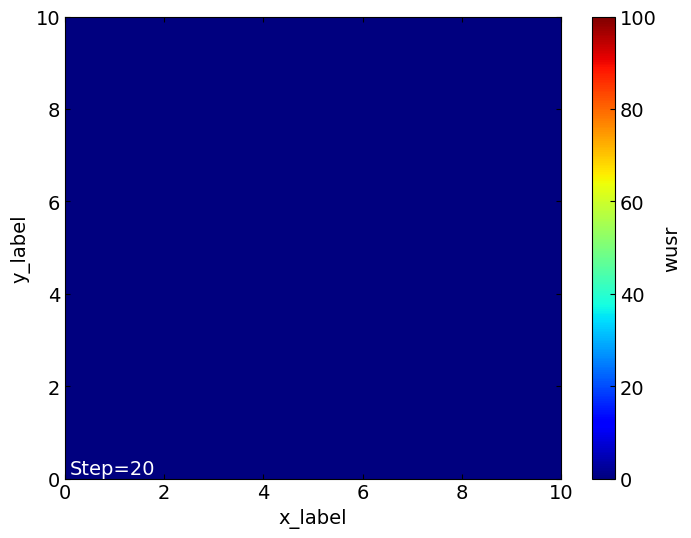

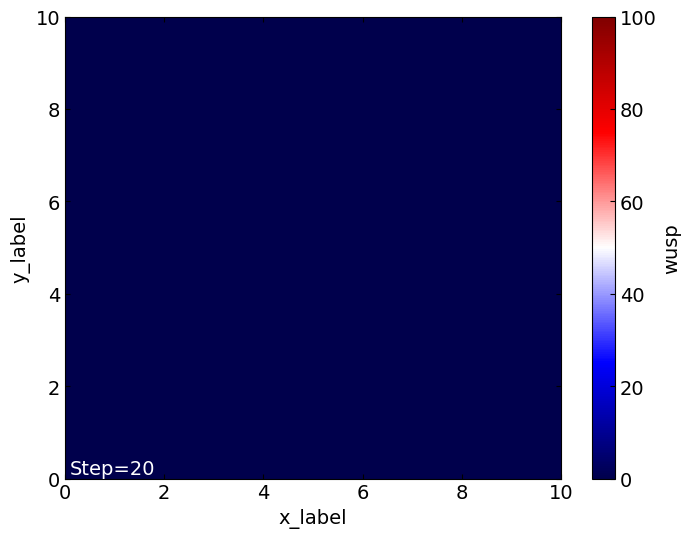

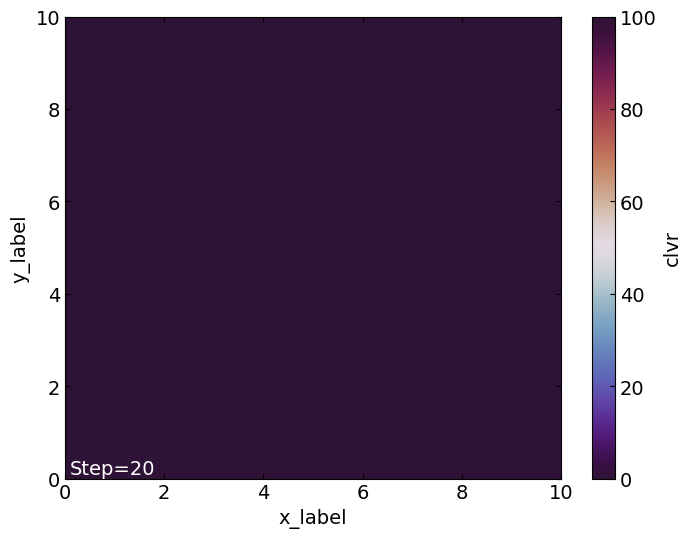

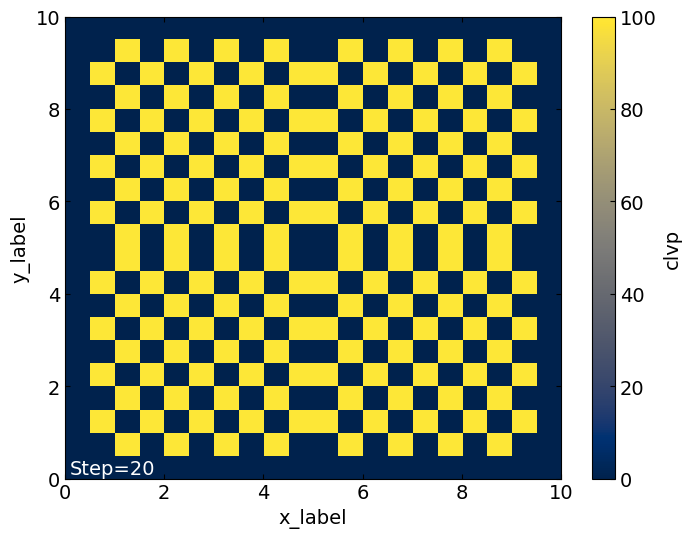

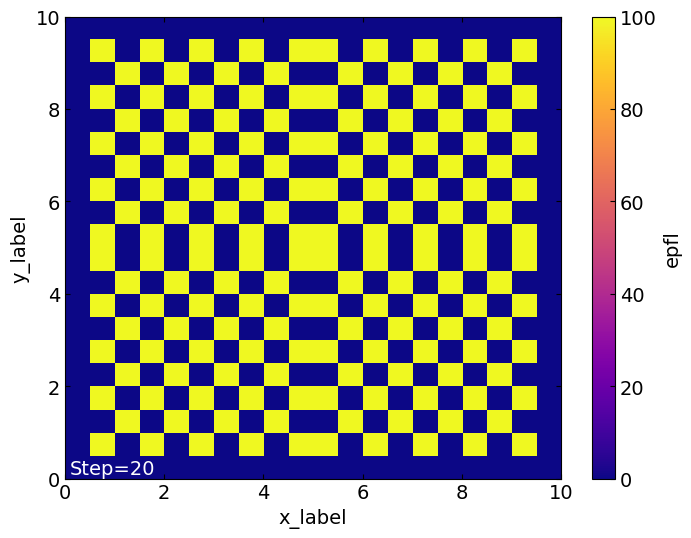

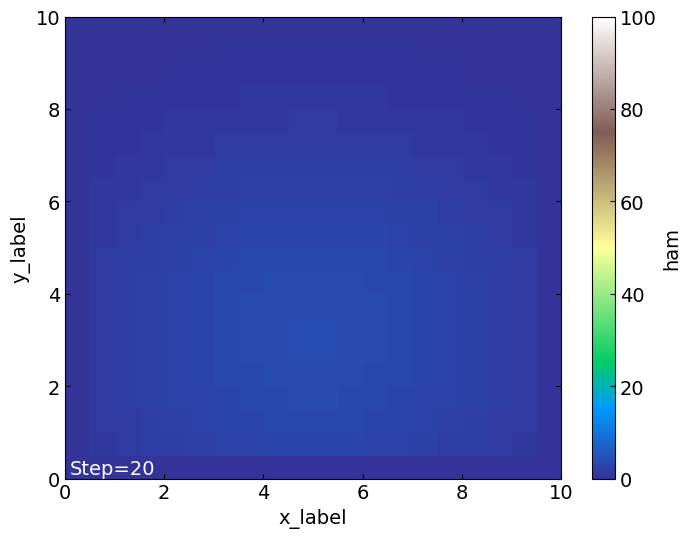

Iteration= 30


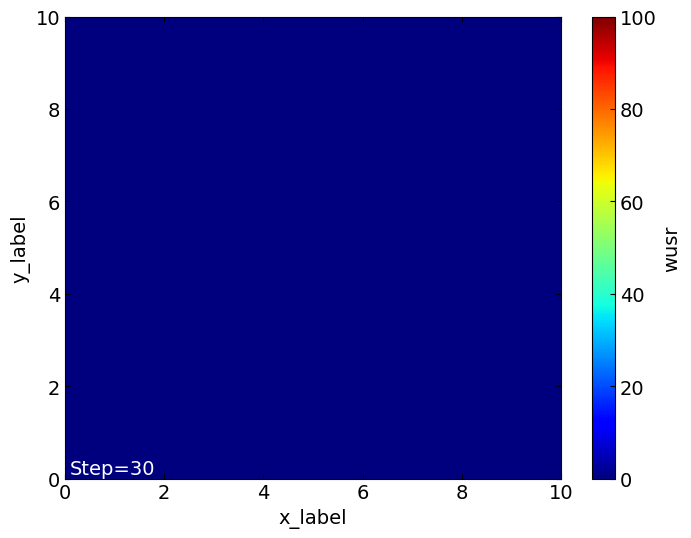

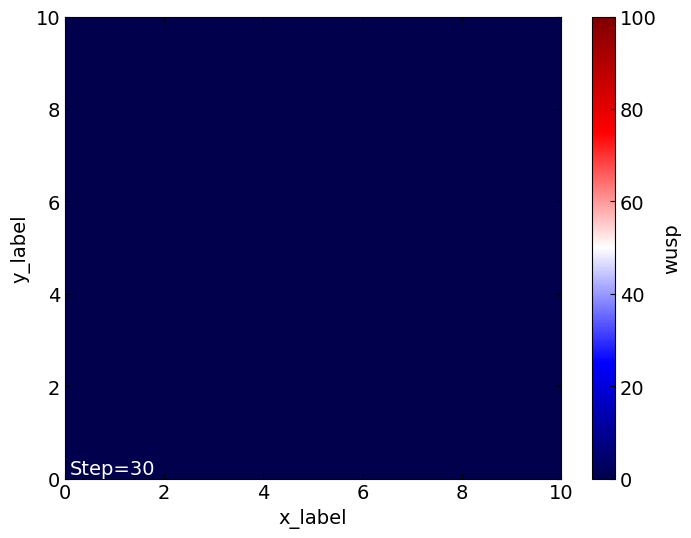

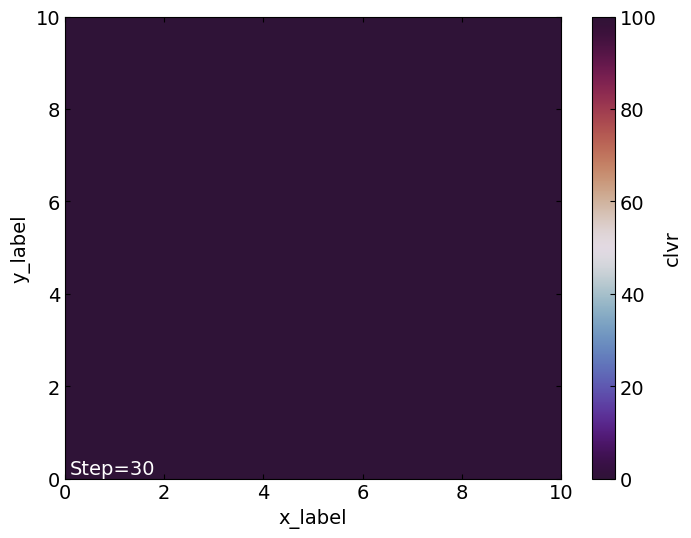

KeyboardInterrupt: 

In [ ]:
# Continous  Param multiple

if __name__ == '__main__':

    # Get parameter table from csv   csv <- sim.data
    Sim_Param_ttt = []
    for index, row in Sim_data.iterrows():
        Sim_Param = row['ID'], row['K_CW'], row['n_CW'], row['k_Cr'], row['K_CL'], row['n_CL'], row['K_CH'], row['n_CH'], row['k_Cp'], row['b_Cr'], row['b_Wr'], row['k_WL'], row['k_WC'], row['k_Wr'],\
            row['K_WW'], row['n_WW'], row['K_WL'], row['n_WL'], row['K_WC'], row['n_WC'], row['k_Wp'], row['b_Ww'], row['b_Wr'], row['ki_W'], row['a_Cc'], row['K_HW'], row['n_HW'], row['b_pp'],\
            row['k_pp'], row['b_Hh'], row['k_Hh'], row['k_Ll'], row['b_Ll'], row['D_Ww'], row['D_Cc'], row['D_Ll']

        Sim_Param_list = list(Sim_Param)
        Sim_Param_ttt.append(Sim_Param_list)

    # Loop Parameter set from Sim_Param_ttt
    for n in range(13):
        Param_opt = Sim_Param_ttt[n]

        ID, K_CW, n_CW, k_Cr, K_CL, n_CL, K_CH, n_CH, k_Cp, b_Cr, b_Wr, k_WL, k_WC, k_Wr, K_WW, n_WW, K_WL, n_WL, K_WC, n_WC, k_Wp, b_Ww, b_Wr, ki_W, a_Cc, K_HW, n_HW, b_pp, k_pp, b_Hh, k_Hh, k_Ll, b_Ll, D_Ww, D_Cc, D_Ll =\
        Param_opt[0], Param_opt[1], Param_opt[2], Param_opt[3], Param_opt[4], Param_opt[5], Param_opt[6], Param_opt[7], Param_opt[8], Param_opt[9], \
        Param_opt[10], Param_opt[11], Param_opt[12], Param_opt[13], Param_opt[14], Param_opt[15], Param_opt[16], Param_opt[17], Param_opt[18], Param_opt[19], \
        Param_opt[20], Param_opt[21], Param_opt[22], Param_opt[23], Param_opt[24], Param_opt[25], Param_opt[26], Param_opt[27], Param_opt[28], Param_opt[29], \
        Param_opt[30], Param_opt[31], Param_opt[32], Param_opt[33], Param_opt[34], Param_opt[35]

        #print(Param_opt)
        print(ID)

        sol_2d_diffusion(x, y, wusr, wusp, clvr, clvp, erf, ham, pull_sol, ID)

